<h1 style=" 
    color: white; 
    background: linear-gradient(to right, #4CAF50, #2E7D32); 
    border: 2px solid #388E3C; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">
    Lending Club Case Study
</h1>

<h4 style="color: blue;">Import all necessary libraries</h4>

In [3140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="color: brown;
    font-weight: 600; 
    padding: 25px 0 20px;">
    1. Read Data File
</h2>

In [3590]:
# Read data file using pandas

df = pd.read_csv("loan.csv", low_memory=False)

In [3596]:
#Set maximum and maximum record number to display

pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

In [3598]:
# Review the sample Dataframe

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

<h2 style="color: brown;
    font-weight: 600; 
    padding: 25px 0 20px;">
    2. Understanding Structure of the Data
</h2>

In [3600]:
# Get dataframe dimensions

df.shape

(39717, 111)

In [3602]:
# Basic information of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3604]:
# Get column information

df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [3606]:
# Get basic statistical details of the dataframe (details of numerical columns)

df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<h2 style="color: brown;
    font-weight: 600; 
    padding: 25px 0 20px;">
    3. Data Quality Check - Identify Missing Values
</h2>

In [3609]:
# Check for missing values in each column

df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [3611]:
# Percentage of missing values for each column

pd.DataFrame(df.isnull().mean().round(4) * 100, columns=['percentage_missing_value']).sort_values(by=['percentage_missing_value'])

,percentage_missing_value
id,0.00
earliest_cr_line,0.00
inq_last_6mths,0.00
open_acc,0.00
pub_rec,0.00
revol_bal,0.00
total_acc,0.00
initial_list_status,0.00
out_prncp,0.00
out_prncp_inv,0.00


In [3621]:
# Summary of missing values associated with columns

prc_missing_col = pd.DataFrame(df.isnull().mean().round(4) * 100, columns=['percentage_missing_value'])

print(f"{round(prc_missing_col[prc_missing_col['percentage_missing_value'] == 0].count() / len(prc_missing_col) * 100, 2)['percentage_missing_value']}% of columns have no missing value")
print(f"{round(prc_missing_col[(prc_missing_col['percentage_missing_value'] > 0) & (prc_missing_col['percentage_missing_value'] <= 10)].count() / len(prc_missing_col) * 100, 2)['percentage_missing_value']}% of columns have missing value between 0-10%")
print(f"{round(prc_missing_col[(prc_missing_col['percentage_missing_value'] > 10) & (prc_missing_col['percentage_missing_value'] <= 50)].count() / len(prc_missing_col) * 100, 2)['percentage_missing_value']}% of columns have missing value between 10-50%")
print(f"{round(prc_missing_col[(prc_missing_col['percentage_missing_value'] > 50) & (prc_missing_col['percentage_missing_value'] < 100)].count() / len(prc_missing_col) * 100, 2)['percentage_missing_value']}% of columns have missing value between 50-100%")
print(f"{round(prc_missing_col[prc_missing_col['percentage_missing_value'] == 100].count() / len(prc_missing_col) * 100, 2)['percentage_missing_value']}% of columns have 100% missing value")

38.74% of columns have no missing value
9.01% of columns have missing value between 0-10%
0.9% of columns have missing value between 10-50%
2.7% of columns have missing value between 50-100%
48.65% of columns have 100% missing value


<h2 style="color: brown;
    font-weight: 600; 
    padding: 25px 0 20px;">
    4. Data Cleaning<br>
</h2>

## Addressing Missing Value

<h4 style="color: blue;
    font-weight: 600; 
    padding: 25px 0 20px;">
    4.1. Drop the columns with 100% missing value
</h4>

In [3627]:
missing_col = df.isnull().mean().round(4) * 100
df = df.drop(columns=missing_col[missing_col == 100].index.tolist())

In [3625]:
# Check the dimensions after dropping 100% missing value columns

df.shape

(39717, 111)

<h4 style="color: blue;
    font-weight: 600; 
    padding: 25px 0 20px;">
    4.2. Analyse columns with 90% missing value
</h4>

<h5 style="
    color: black; 
    font-weight: 600; 
    background: #b6f0c6; 
    padding: 5px; 
    display: inline;">
    1. Analysing metric - 'next_pymnt_d' - 97.13%
</h5>

In [3189]:
df['next_pymnt_d'].describe()

count       1140
unique         2
top       Jun-16
freq        1125
Name: next_pymnt_d, dtype: object

In[673]:

In [3191]:
df['next_pymnt_d'].value_counts(normalize=True)*100

next_pymnt_d
Jun-16    98.684211
Jul-16     1.315789
Name: proportion, dtype: float64

In[518]:

In [3631]:
# Compare against the target variable

df[['loan_status', 'next_pymnt_d']]

,loan_status,next_pymnt_d
0,Fully Paid,NaN
1,Charged Off,NaN
2,Fully Paid,NaN
3,Fully Paid,NaN
4,Current,Jun-16
...,...,...
39712,Fully Paid,NaN
39713,Fully Paid,NaN
39714,Fully Paid,NaN
39715,Fully Paid,NaN


In [3633]:
# Compare against the target variable

df.groupby('loan_status')['next_pymnt_d'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off     5627
Current            0
Fully Paid     32950
Name: next_pymnt_d, dtype: int64

#### `Conclusion: The 'next_pymnt_d' variable contains missing values for 'Charged Off' customers, who are our target audience. Therefore, we can leave these missing values as is. This variable is crucial for identifying the likelihood of defaulters who fail to pay their installments on the specified date. We can determine later whether to drop this column.`

<h5 style="
    color: black; 
    font-weight: 600; 
    background: #b6f0c6; 
    padding: 5px; 
    display: inline;">
    2. Analysing metric - 'mths_since_last_record' - 92.99%
</h5>

In [3201]:
df['mths_since_last_record'].describe()

count    2786.000000
mean       69.698134
std        43.822529
min         0.000000
25%        22.000000
50%        90.000000
75%       104.000000
max       129.000000
Name: mths_since_last_record, dtype: float64

In [3203]:
df['mths_since_last_record'].value_counts(normalize=True)*100

mths_since_last_record
0.0      24.048816
104.0     2.189519
89.0      2.153625
113.0     2.117732
111.0     2.045944
94.0      1.974156
108.0     1.974156
93.0      1.938263
87.0      1.938263
100.0     1.902369
106.0     1.902369
88.0      1.902369
110.0     1.902369
109.0     1.866475
96.0      1.830581
86.0      1.830581
97.0      1.830581
114.0     1.830581
99.0      1.794688
101.0     1.794688
90.0      1.758794
103.0     1.758794
107.0     1.722900
85.0      1.687006
117.0     1.687006
91.0      1.579325
92.0      1.579325
102.0     1.543431
98.0      1.507538
116.0     1.471644
95.0      1.435750
105.0     1.435750
112.0     1.399856
115.0     1.328069
118.0     1.292175
63.0      0.538406
76.0      0.538406
61.0      0.502513
58.0      0.466619
80.0      0.430725
67.0      0.394831
81.0      0.394831
69.0      0.394831
55.0      0.394831
119.0     0.358938
54.0      0.358938
77.0      0.358938
73.0      0.323044
53.0      0.323044
64.0      0.323044
72.0      0.323044
50.0    

In [3636]:
# Compare the column against the target column/variable

df[['loan_status', 'mths_since_last_record']]

,loan_status,mths_since_last_record
0,Fully Paid,NaN
1,Charged Off,NaN
2,Fully Paid,NaN
3,Fully Paid,NaN
4,Current,NaN
...,...,...
39712,Fully Paid,0.0
39713,Fully Paid,0.0
39714,Fully Paid,0.0
39715,Fully Paid,0.0


In [3638]:
df.groupby('loan_status')['mths_since_last_record'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off     5049
Current         1094
Fully Paid     30788
Name: mths_since_last_record, dtype: int64

#### `Conclusion: A shorter duration since the last record may indicate more recent financial activity or changes in behavior, which could signal potential risk. Hence we can leave the missing value as is.`

<h4 style="
    color: blue;
    font-weight: 600; 
    padding: 25px 0 20px;">
    4.3. Analyse other columns with missing value
</h4>

<h5 style="
    color: black; 
    font-weight: 600; 
    background: #b6f0c6; 
    padding: 5px; 
    display: inline;">
    3. Analysing metric - 'mths_since_last_delinq' - 64.66%
</h5>

In [3214]:
df['mths_since_last_delinq'].describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In[669]:

In [3216]:
df['mths_since_last_delinq'].value_counts(normalize=True)*100

mths_since_last_delinq
0.0      3.156395
15.0     1.795511
30.0     1.759886
23.0     1.759886
24.0     1.717136
19.0     1.695761
38.0     1.688636
20.0     1.660135
18.0     1.645885
22.0     1.645885
31.0     1.631635
35.0     1.617385
32.0     1.610260
39.0     1.596010
25.0     1.588885
45.0     1.581760
37.0     1.546135
26.0     1.546135
21.0     1.539010
17.0     1.524760
16.0     1.524760
27.0     1.510509
36.0     1.496259
42.0     1.482009
10.0     1.482009
29.0     1.474884
47.0     1.467759
43.0     1.432134
34.0     1.432134
44.0     1.425009
14.0     1.410759
46.0     1.403634
41.0     1.403634
40.0     1.403634
12.0     1.389384
48.0     1.382259
28.0     1.375134
6.0      1.368009
33.0     1.339508
9.0      1.296758
7.0      1.254008
13.0     1.218383
8.0      1.197007
11.0     1.182757
4.0      1.090132
49.0     1.083007
5.0      1.075882
58.0     1.054507
3.0      1.033131
59.0     1.018881
53.0     1.018881
52.0     0.976131
56.0     0.954756
73.0     0.933381
50.0 

In [3642]:
# Compare the column against the target column/variable

df[['loan_status', 'mths_since_last_delinq']]

,loan_status,mths_since_last_delinq
0,Fully Paid,NaN
1,Charged Off,NaN
2,Fully Paid,NaN
3,Fully Paid,35.0
4,Current,38.0
...,...,...
39712,Fully Paid,0.0
39713,Fully Paid,5.0
39714,Fully Paid,0.0
39715,Fully Paid,0.0


In [3644]:
# Compare the count of missing value against the target variable

df.groupby('loan_status')['mths_since_last_delinq'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off     3485
Current          777
Fully Paid     21420
Name: mths_since_last_delinq, dtype: int64

#### `Conclusion: This metric helps lenders evaluate the likelihood of future delinquencies. This metric is often considered in calculating a borrowerâ€™s credit score. A borrower with a recent delinquency may be viewed as a higher credit risk, while a borrower with a longer period since their last delinquency may be seen as more responsible. Replacing empty values with 0 might mislead interpretations. Hence we can leave the missing value as is.`

<h5 style="
    color: black; 
    font-weight: 600; 
    background: #b6f0c6; 
    padding: 5px; 
    display: inline;">
    4. Analysing metric - 'desc' - 32.59%
</h5>

In [3226]:
df['desc'].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [3228]:
df.groupby('loan_status')['desc'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off     1802
Current          413
Fully Paid     10727
Name: desc, dtype: int64

#### `Conclusion: This metric helps to describe the reason for loan taken. This may not impact on the target variable.. Therefore we can drop this column.`

In [3647]:
# dropping the desc column

df.drop('desc', axis=1, inplace=True)

In [3649]:
# Verify the dataframe dimension

df.shape

(39717, 56)

<h5 style="
    color: black; 
    font-weight: 600; 
    background: #b6f0c6; 
    padding: 5px; 
    display: inline;">
    5. Analysing metric - 'emp_title' - 6.19%
</h5>

In [3238]:
df['emp_title'].describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [3240]:
df['emp_title'].head()

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [3242]:
df.groupby('loan_status')['emp_title'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off     484
Current          73
Fully Paid     1902
Name: emp_title, dtype: int64

#### `Conclusion: This metric indicates the job title of a borrower. While it may not directly affect the target variable, it can be useful for analysis, so we will leave it unchanged.`

<h5 style="
    color: black; 
    font-weight: 600; 
    background: #b6f0c6; 
    padding: 5px; 
    display: inline;">
    6. Analysing metric - 'emp_length' - 2.71%
</h5>

In [3246]:
df['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [3248]:
df['emp_length'].value_counts(normalize=True)*100

emp_length
10+ years    22.977589
< 1 year     11.860152
2 years      11.355520
3 years      10.597278
4 years       8.891879
5 years       8.493349
1 year        8.384659
6 years       5.768335
7 years       4.588272
8 years       3.827442
9 years       3.255525
Name: proportion, dtype: float64

In [3250]:
df.groupby('loan_status')['emp_length'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off    228
Current         42
Fully Paid     805
Name: emp_length, dtype: int64

#### `Conclusion: This metric indicates the job experience of a borrower. While it may not directly affect the target variable, it can be useful for analysis, so we will leave it unchanged.`

<h5 style="
    color: black; 
    font-weight: 600; 
    background: #b6f0c6; 
    padding: 5px; 
    display: inline;">
    7. Analysing metric - 'pub_rec_bankruptcies' - 1.75%
</h5>

In [3254]:
df['pub_rec_bankruptcies'].value_counts(normalize=True)*100

pub_rec_bankruptcies
0.0    95.691953
1.0     4.290108
2.0     0.017940
Name: proportion, dtype: float64

In [3256]:
df['pub_rec_bankruptcies'].describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [3258]:
df.groupby('loan_status')['pub_rec_bankruptcies'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off    118
Current          0
Fully Paid     579
Name: pub_rec_bankruptcies, dtype: int64

#### `Conclusion: A bankruptcy filing is a strong indicator that the borrower has faced significant financial challenges. This can raise red flags for lenders and creditors regarding the borrowerâ€™s ability to manage debt. so we will leave it unchanged.`

<h5 style="
    color: black; 
    font-weight: 600; 
    background: #b6f0c6; 
    padding: 5px; 
    display: inline;">
    8. Analysing metric - 'last_pymnt_d' - 0.18%
</h5>

In [3262]:
df['last_pymnt_d'].describe()

count      39646
unique       101
top       May-16
freq        1256
Name: last_pymnt_d, dtype: object

In [3264]:
df.groupby('loan_status')['last_pymnt_d'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off    71
Current         0
Fully Paid      0
Name: last_pymnt_d, dtype: int64

#### `Conclusion: This date reflects how recently the borrower made a payment. A more recent date suggests that the borrower is actively managing their loan, while an older date may indicate potential issues. We can not treat the missing value with some random value hence we will leave it unchanged.`

<h5 style="
    color: black; 
    font-weight: 600; 
    background: #b6f0c6; 
    padding: 5px; 
    display: inline;">
    9. Analysing metric - 'chargeoff_within_12_mths' - 0.14%
</h5>

In [3268]:
df['chargeoff_within_12_mths'].describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [3270]:
df['chargeoff_within_12_mths'].value_counts(normalize=True)*100

chargeoff_within_12_mths
0.0    100.0
Name: proportion, dtype: float64

In [3272]:
df.groupby('loan_status')['chargeoff_within_12_mths'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off     6
Current         0
Fully Paid     50
Name: chargeoff_within_12_mths, dtype: int64

#### `Conclusion: This metric refers to whether a borrower has had any loans charged off (written off as uncollectible) within the past 12 months. Since no 100% of them have 0 entries and most of the null values belong to Fully Paid borrowers, we can substitute missing values with 0`

In [3658]:
# Treating missing values with 0

df['chargeoff_within_12_mths'] = pd.to_numeric(df['chargeoff_within_12_mths'], errors='coerce')

df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].fillna(0)

df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].astype(int)

In [3660]:
# Verify the metric after imputation

df.groupby('loan_status')['chargeoff_within_12_mths'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off    0
Current        0
Fully Paid     0
Name: chargeoff_within_12_mths, dtype: int64

<h5 style="
    color: black; 
    font-weight: 600; 
    background: #b6f0c6; 
    padding: 5px; 
    display: inline;">
    10. Analysing metric - 'collections_12_mths_ex_med' - 0.14%
</h5>

In [3284]:
df['collections_12_mths_ex_med'].describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [3286]:
df['collections_12_mths_ex_med'].value_counts(normalize=True)*100

collections_12_mths_ex_med
0.0    100.0
Name: proportion, dtype: float64

In [3288]:
df.groupby('loan_status')['collections_12_mths_ex_med'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off     6
Current         0
Fully Paid     50
Name: collections_12_mths_ex_med, dtype: int64

#### `Conclusion: metric is a vital tool for assessing recent credit risk and financial stability. It provides insight into how well a borrower manages their non-medical financial obligations, which can be predictive of future repayment behavior and risk. Since no 100% of them have 0 entries indicates that no borrowers in the dataset have experienced collections in the past 12 months (which is little bit suspecious), we can substitute missing values with 0`

In [3663]:
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

## Verify the metric after imputation

df.groupby('loan_status')['collections_12_mths_ex_med'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off    0
Current        0
Fully Paid     0
Name: collections_12_mths_ex_med, dtype: int64

<h2 style="color: brown;
    font-weight: 600; 
    padding: 25px 0 20px;">
    5. Filter Data<br>
</h2>

In [3295]:
df.shape

(39717, 56)

In [3297]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
mths_since_last_delinq      

In [3298]:
df.apply(lambda x: x.unique())

id                            [1077501, 1077430, 1077175, 1076863, 1075358, ...
member_id                     [1296599, 1314167, 1313524, 1277178, 1311748, ...
loan_amnt                     [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
funded_amnt                   [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
funded_amnt_inv               [4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000...
term                                                   [ 36 months,  60 months]
int_rate                      [10.65%, 15.27%, 15.96%, 13.49%, 12.69%, 7.90%...
installment                   [162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ...
grade                                                     [B, C, A, E, F, D, G]
sub_grade                     [B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...
emp_title                     [nan, Ryder, AIR RESOURCES BOARD, University M...
emp_length                    [10+ years, < 1 year, 1 year, 3 years, 8 years...
home_ownership                          

In [3299]:
# Removing columns with same value (1 unique value)

df = df.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis=1)

df.shape

(39717, 47)

<h2 style="color: brown;
    font-weight: 600; 
    padding: 25px 0 20px;">
    6. Correcting Data<br>
</h2>

In [3301]:
# Fix annual income to int value

df['annual_inc'] = df['annual_inc'].round().astype(int)

df['annual_inc'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: annual_inc
Non-Null Count  Dtype
--------------  -----
39717 non-null  int32
dtypes: int32(1)
memory usage: 155.3 KB


In [3302]:
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df['int_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


<h2 style="color: brown;
    font-weight: 600; 
    padding: 25px 0 20px;">
    7. Univariate Analysis
</h2>

<h5 style="<br>
    color: black; <br>
    font-weight: 600; <br>
    background: #b6f0c6; <br>
    padding: 5px; <br>
    display: inline;"><br>
    Understand the distribution of loan amounts and identify common loan sizes<br>
</h5>


In [3305]:
df['loan_amnt'].describe()


count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

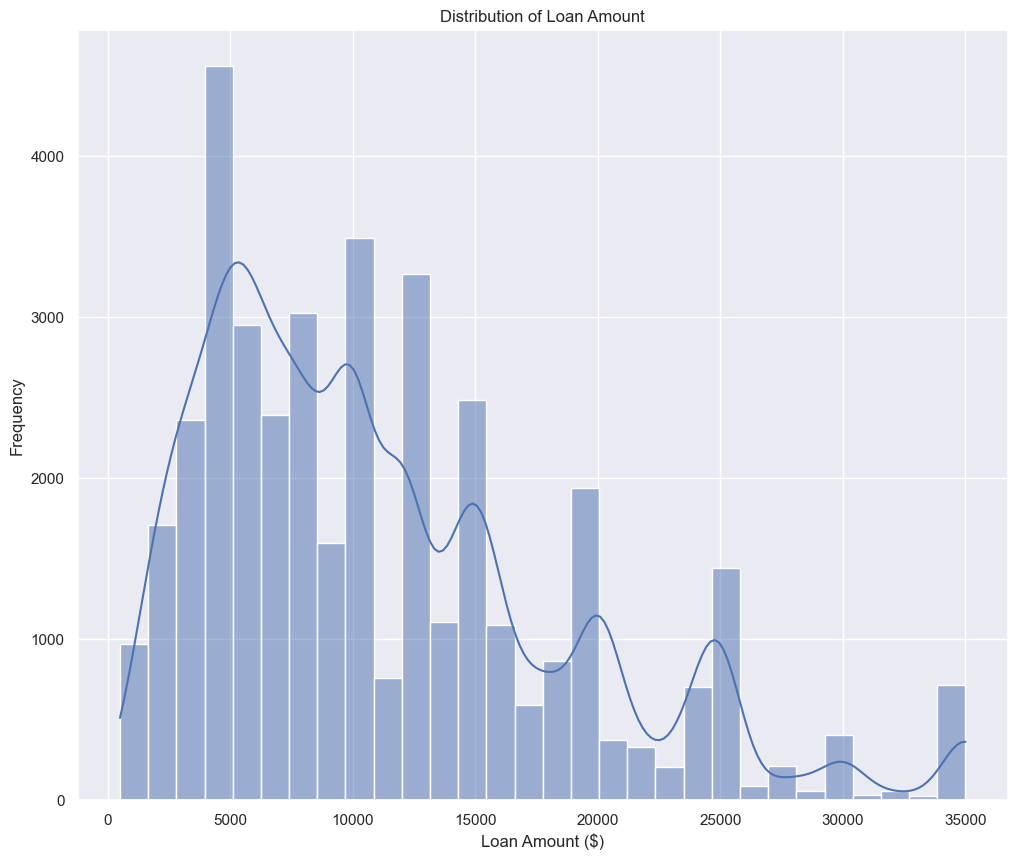

In [3306]:
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.show()

#### Analysis
1) The distribution is right-skewed, meaning there are more loans for smaller amounts compared to larger amounts.
2) The peak of the distribution is between 5,000 and 10,000, indicating that this range is the most common loan amount..
3) There is a long tail to the right, suggesting that some individuals borrow significantly higher amounts.
4) The histogram has a bimodal shape, with two distinct peaks. This might suggest two different groups of borrowers with different loan needs.
 The graph suggests that the majority of loans are for smaller amounts, with a smaller number of larger loans

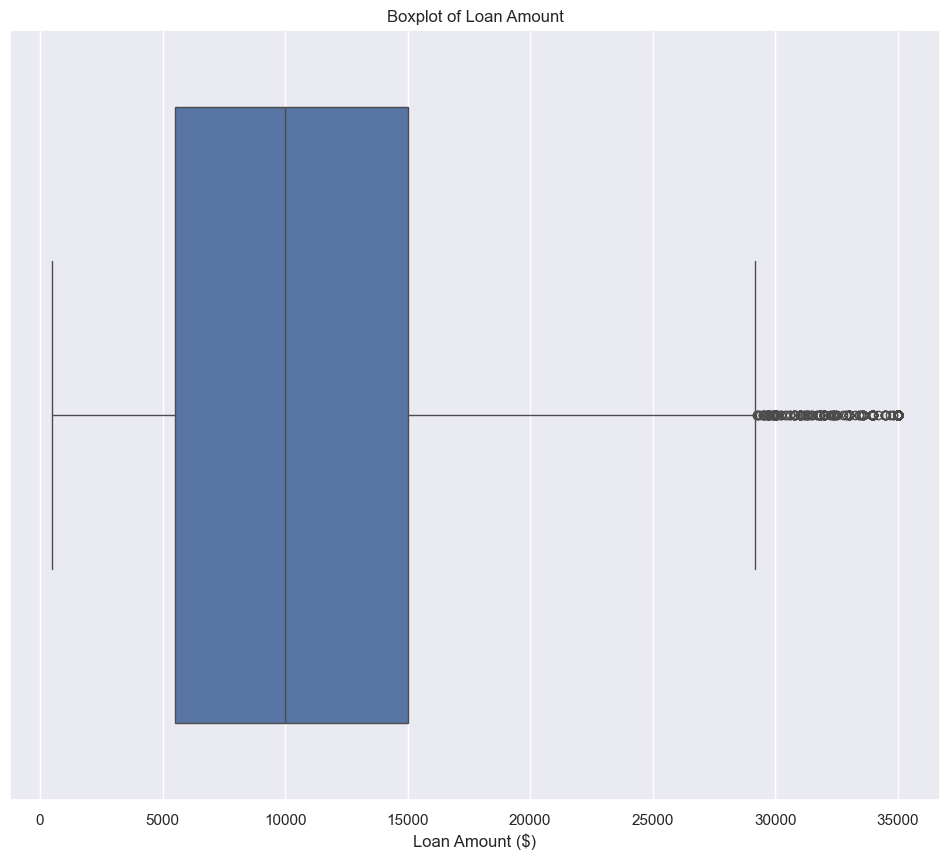

In [3308]:
sns.boxplot(x=df['loan_amnt'])
plt.title('Boxplot of Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.show()


#### Analysis
1) The median loan amount is around 10,000, which is within the interquartile range (IQR). This indicates that the majority of loans are clustered around this value.
2) The distribution is heavily right-skewed, as evidenced by the long whisker on the right side. This suggests that there are a significant number of outliers (very large loan amounts) compared to the majority of loans.
3) The outliers likely correspond to the larger loan amounts observed in the histogram.
4) The IQR suggests that the majority of loans are within a relatively small range of amounts.


<h5 style="<br>
    color: black; <br>
    font-weight: 600; <br>
    background: #b6f0c6; <br>
    padding: 5px; <br>
    display: inline;"><br>
    Assess how interest rates vary among borrowers.<br>
</h5>



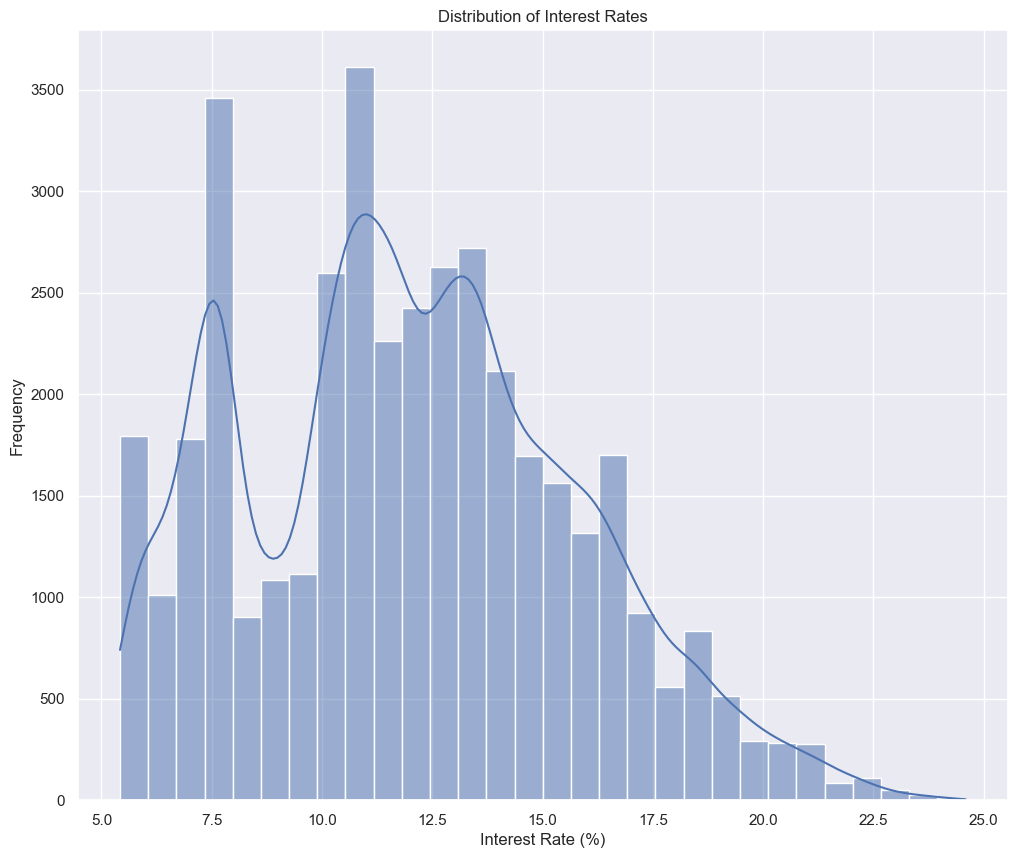

In [3311]:
sns.histplot(df['int_rate'], bins=30, kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()


#### Analysis
1)  The right-skewed distribution suggests that the lender's pricing strategy is skewed towards offering lower interest rates to a larger portion of borrowers. .
2) The different peaks in the distribution could suggest that the lender is targeting different customer segments with varying interest rate offerings.
3)  While offering lower interest rates to a larger portion of borrowers might increase market share, it could also impact the lender's profitability

<h5 style="<br>
    color: black; <br>
    font-weight: 600; <br>
    background: #b6f0c6; <br>
    padding: 5px; <br>
    display: inline;"><br>
    Examine the income levels of borrowers.<br>
</h5>

In [3314]:
df['annual_inc'].describe()


count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

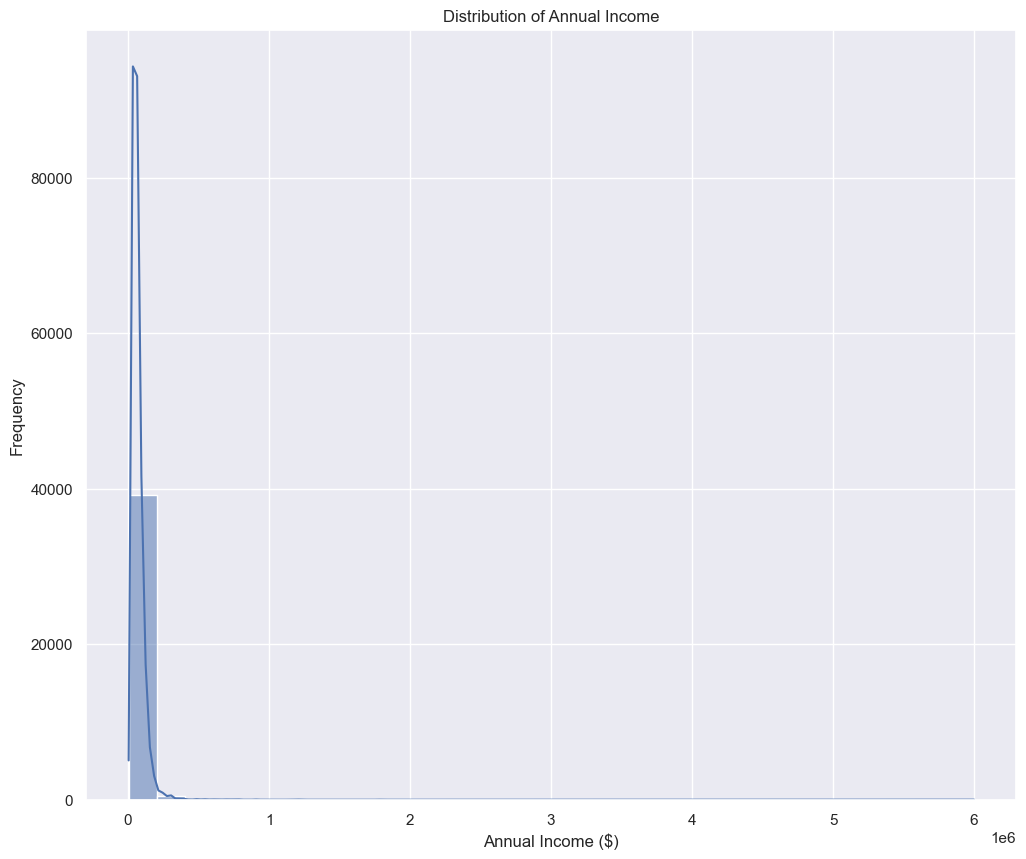

In [3315]:
sns.histplot(df['annual_inc'], bins=30, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.show()

#### Analysis
1) The majority of borrowers have lower annual incomes, while a smaller number have significantly higher incomes. This indicates that the dataset is skewed towards lower-income individuals
2) The distribution has a pronounced peak near zero, suggesting that a large number of borrowers report very low or no income. This could be due to various reasons, such as part-time employment, self-employment, or reliance on other sources of income.
3) The distribution has a long tail on the right side, indicating that there are a small number of borrowers with extremely high incomes.
4)  The frequency of borrowers decreases as annual income increases.



<h5 style="<br>
    color: black; <br>
    font-weight: 600; <br>
    background: #b6f0c6; <br>
    padding: 5px; <br>
    display: inline;"><br>
    Understand borrowers' financial leverage.<br>
</h5>

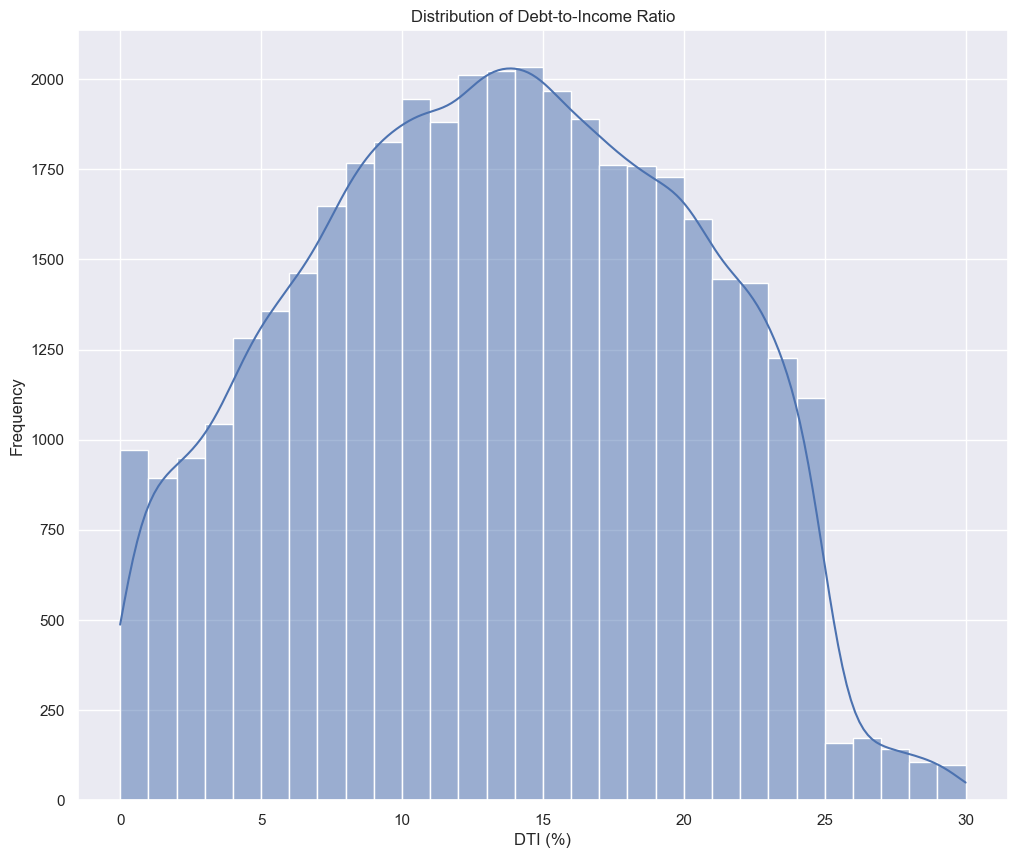

In [3318]:
sns.histplot(df['dti'], bins=30, kde=True)
plt.title('Distribution of Debt-to-Income Ratio')
plt.xlabel('DTI (%)')
plt.ylabel('Frequency')
plt.show()

#### Analysis
1) The distribution is slightly right-skewed, indicating that a larger proportion of borrowers have lower debt-to-income ratios compared to those with higher ratios.
2) The distribution has a clear peak around 10-15%, suggesting that this range is the most common debt-to-income ratio among borrowers.
#### The distribution of debt-to-income ratios suggests that the majority of borrowers have manageable debt levels, with a smaller proportion having higher debt burdens

<h5 style="<br>
    color: black; <br>
    font-weight: 600; <br>
    background: #b6f0c6; <br>
    padding: 5px; <br>
    display: inline;"><br>
    Understand borrowers' housing status.<br>
</h5>

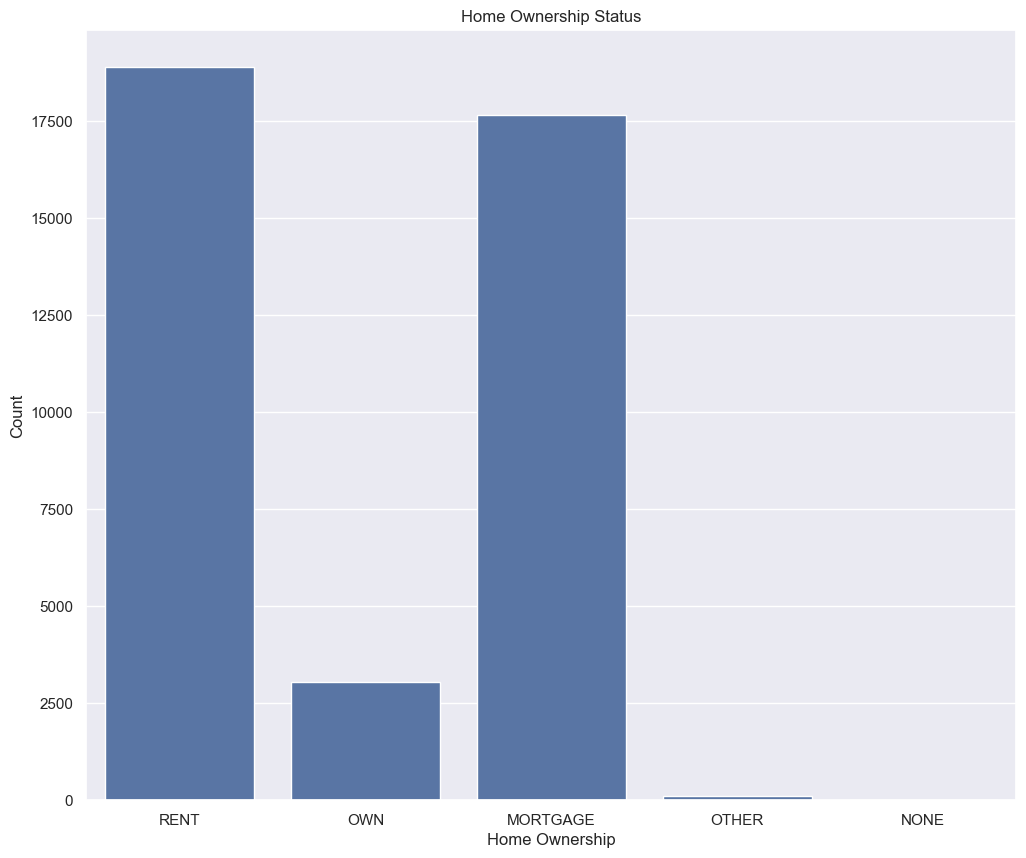

In [3321]:
sns.countplot(x='home_ownership', data=df)
plt.title('Home Ownership Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()


#### Analysis
1) The category "RENT" has the highest frequency, indicating that a significant portion of the borrowers are renters
2) The categories "OTHER" and "NONE" have significantly lower frequencies. This indicates that these categories are less common among the borrowers.
3)  The graph shows that the "OWN" category has a lower frequency compared to "RENT" and "MORTGAGE."
#### The distribution of home ownership status suggests that a majority of the borrowers are renters, followed by homeowners and mortgage holders. The categories "OTHER" and "NONE" are relatively infrequent. 

<h5 style="<br>
    color: black; <br>
    font-weight: 600; <br>
    background: #b6f0c6; <br>
    padding: 5px; <br>
    display: inline;"><br>
    Identify common reasons for borrowing.<br>
</h5>

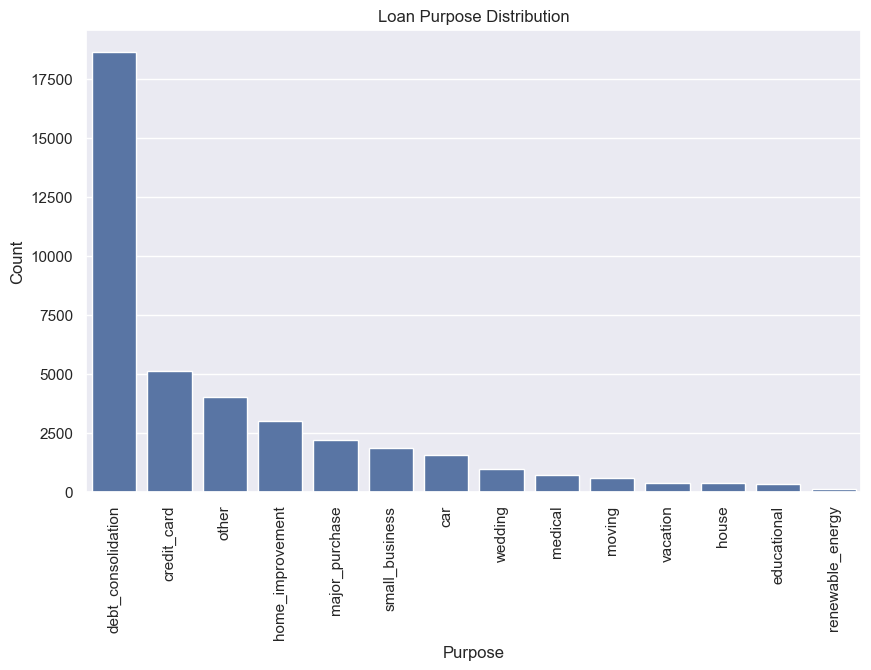

In [3324]:
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', data=df, order=df['purpose'].value_counts().index)  # Countplot with vertical bars
plt.title('Loan Purpose Distribution')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are too many categories
plt.show()



#### Analysis
1) The category "debt_consolidation" has the highest frequency, indicating that a significant portion of borrowers are using loans to consolidate existing debts.
2) The categories "credit_card" and "home_improvement" also have relatively high frequencies, suggesting that these are common loan purposes.
#### The distribution of loan purposes suggests that debt consolidation is the most common reason for borrowers to take out loans. Other popular purposes include credit card debt and home improvements. A variety of other purposes are also represented, indicating the diverse needs of borrowers.



<h5 style="<br>
    color: black; <br>
    font-weight: 600; <br>
    background: #b6f0c6; <br>
    padding: 5px; <br>
    display: inline;"><br>
    Assess borrowers' recent credit delinquencies.<br>
</h5>

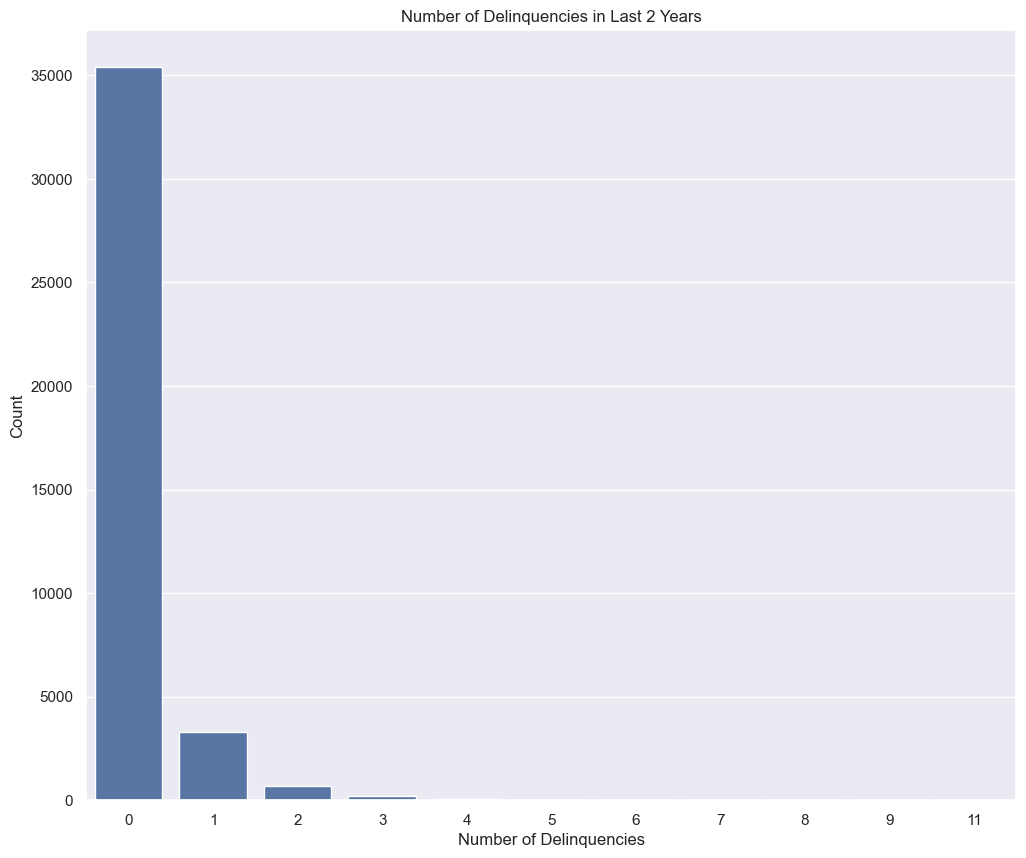

In [3327]:
sns.countplot(x='delinq_2yrs', data=df)
plt.title('Number of Delinquencies in Last 2 Years')
plt.xlabel('Number of Delinquencies')
plt.ylabel('Count')
plt.show()



#### Analysis
1) The majority of borrowers have no reported delinquencies in the past 2 years, as indicated by the tall bar at 0. This suggests that a significant portion of the borrower base has a clean credit history.
2) The frequency of borrowers with delinquencies decreases as the number of delinquencies increases. This indicates that fewer borrowers have multiple delinquencies.
3) The distribution is heavily right-skewed, further emphasizing the concentration of borrowers with no delinquencies.
#### The distribution of delinquencies in the past 2 years suggests that a majority of borrowers have no reported delinquencies. A smaller proportion of borrowers have one or more delinquencies, with a decreasing frequency as the number of delinquencies increases.

<h5 style="<br>
    color: black; <br>
    font-weight: 600; <br>
    background: #b6f0c6; <br>
    padding: 5px; <br>
    display: inline;"><br>
    Understand borrowers' credit history depth.<br>
</h5>

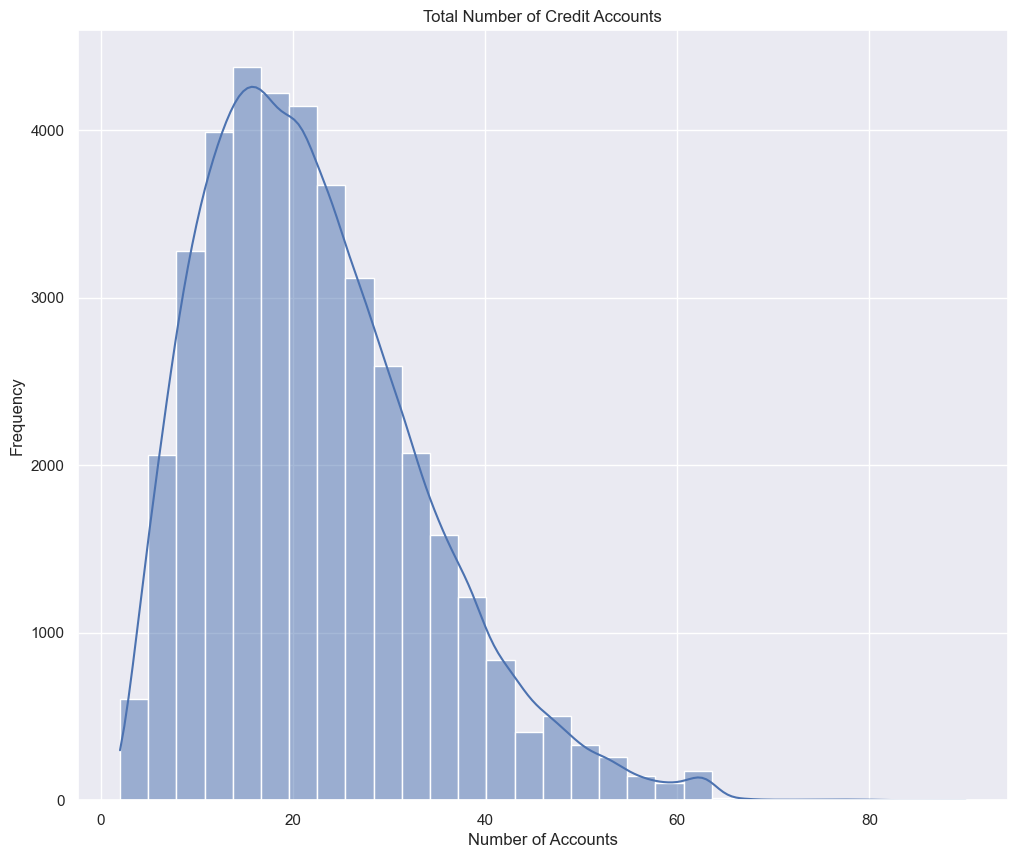

In [3330]:
sns.histplot(df['total_acc'], bins=30, kde=True)
plt.title('Total Number of Credit Accounts')
plt.xlabel('Number of Accounts')
plt.ylabel('Frequency')
plt.show()


#### Analysis
1) The majority of borrowers have a relatively small number of credit accounts, while a smaller proportion have a larger number of accounts.
2) The distribution has a clear peak around 20-30 accounts, suggesting that this range is the most common number of credit accounts among borrowers.
3)  The frequency of borrowers decreases as the number of credit accounts increases. This suggests that fewer borrowers have a large number of accounts.
#### The distribution of total number of credit accounts suggests that a majority of borrowers have a moderate number of accounts, with a smaller proportion having a larger number of accounts. 

<h5 style="<br>
    color: black; <br>
    font-weight: 600; <br>
    background: #b6f0c6; <br>
    padding: 5px; <br>
    display: inline;"><br>
    Examine current credit obligations.<br>
</h5>

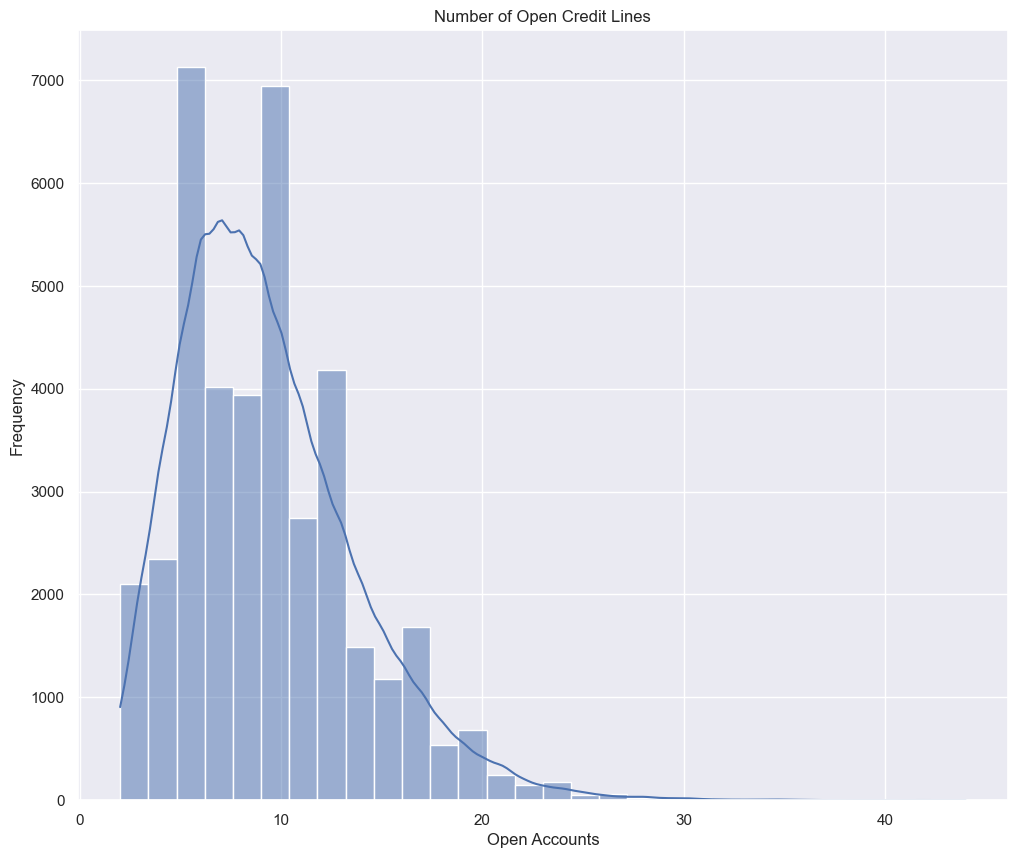

In [3333]:
sns.histplot(df['open_acc'], bins=30, kde=True)
plt.title('Number of Open Credit Lines')
plt.xlabel('Open Accounts')
plt.ylabel('Frequency')
plt.show()


#### Analysis
1) The majority of borrowers have a relatively small number of open credit lines, while a smaller proportion have a larger number of lines.
2) The distribution has a clear peak around 10-15 accounts, suggesting that this range is the most common number of open credit lines among borrowers.
3)  The frequency of borrowers decreases as the number of open credit lines increases.
#### The distribution of the number of open credit lines suggests that a majority of borrowers have a moderate number of lines, with a smaller proportion having a larger number of lines. 

<h5 style="<br>
    color: black; <br>
    font-weight: 600; <br>
    background: #b6f0c6; <br>
    padding: 5px; <br>
    display: inline;"><br>
    Identify derogatory public records.<br>
</h5>

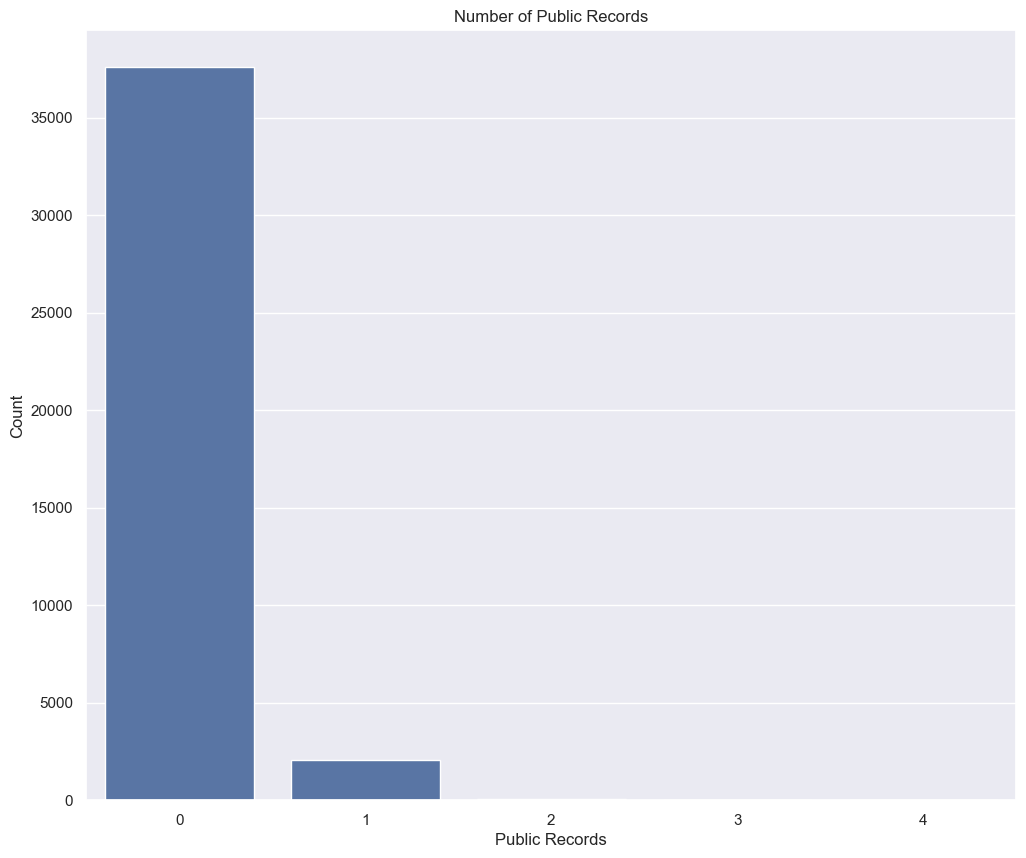

In [3336]:
sns.countplot(x='pub_rec', data=df)
plt.title('Number of Public Records')
plt.xlabel('Public Records')
plt.ylabel('Count')
plt.show()


#### Analysis
1) The majority of borrowers have no reported public records, as indicated by the tall bar at 0. This suggests that a significant portion of the borrower base has a clean credit histor
2) The frequency of borrowers with public records decreases as the number of records increases. This indicates that fewer borrowers have multiple public records
3) The distribution has a long tail on the right side, suggesting that a small number of borrowers have a significant number of public records.
#### The distribution of public records suggests that a majority of borrowers have no reported public records. A smaller proportion of borrowers have one or more public records, with a decreasing frequency as the number of records increases.

<h2 style="color: brown;
    font-weight: 600; 
    padding: 25px 0 20px;">
   8. Bivariate Analysis<br>
</h2>

In [3339]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

## Key Columns to Consider:

- Loan Information: loan_amnt, funded_amnt, term, int_rate, installment
- Applicant's Financial Status: annual_inc, dti, revol_util
- Credit History: inq_last_6mths, open_acc, total_acc, delinq_2yrs, pub_rec
- Employment and Verification: emp_length, home_ownership, verification_status
- Loan Status: loan_status (target variable)

In [3341]:
# Filter dataframe
subset = df[(df["loan_status"] == "Charged Off") | (df["loan_status"] == "Fully Paid")]

## Analysing categorical Variables

- grade
- term
- home_ownership
- verification_status
- emp_length
- annual_inc
- loan_amnt
- purpose

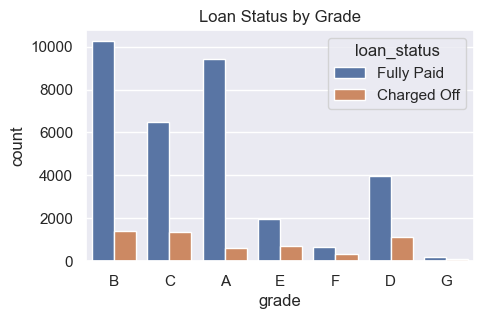

In [3343]:
# Plot loan default by loan grade

plt.figure(figsize=(5, 3))
sns.countplot(x='grade', hue='loan_status', data=subset)
plt.title('Loan Status by Grade')
plt.show()

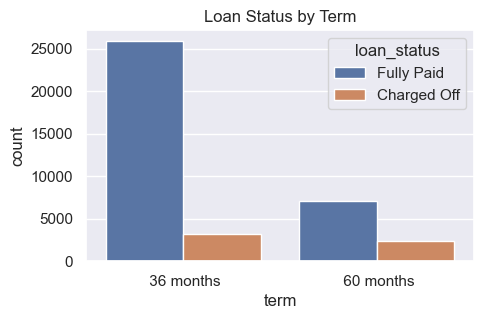

In [3344]:
# Plot loan default by term

plt.figure(figsize=(5, 3))
sns.countplot(x='term', hue='loan_status', data=subset)
plt.title('Loan Status by Term')
plt.show()

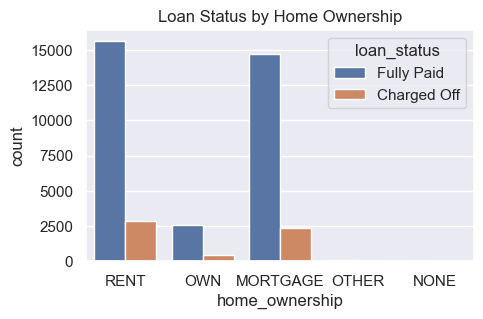

In [3345]:
# Plot loan default by home ownership

plt.figure(figsize=(5, 3))
sns.countplot(x='home_ownership', hue='loan_status', data=subset)
plt.title('Loan Status by Home Ownership')
plt.show()

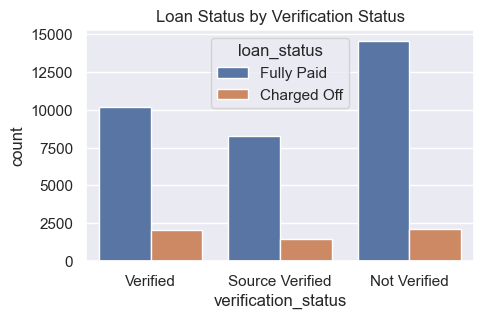

In [3346]:
# Plot loan default by verification status

plt.figure(figsize=(5, 3))
sns.countplot(x='verification_status', hue='loan_status', data=subset)
plt.title('Loan Status by Verification Status')
plt.show()

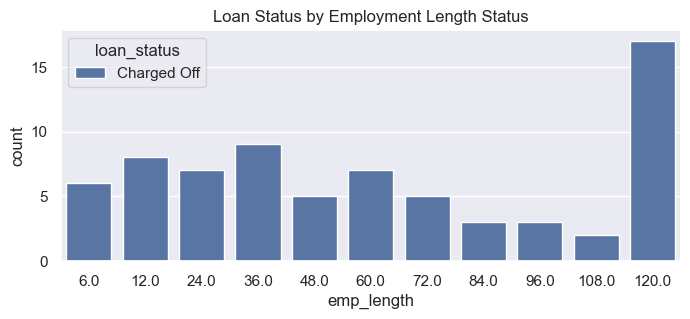

In [3670]:
# Plot loan default by employee experience status

emp_length_modified = subset['emp_length'].str.replace('years', '').str.replace('year', '').str.strip()
emp_length_modified = emp_length_modified.replace({'< 1': '0.5', '10+': '10'})
emp_length_in_months = pd.to_numeric(emp_length_modified, errors='coerce') * 12
subset.loc[:, 'emp_length_in_months'] = emp_length_in_months.fillna(0).astype(int)



plt.figure(figsize=(8, 3))
sns.countplot(x=emp_length_in_months, hue='loan_status', data=subset)
plt.title('Loan Status by Employment Length Status')
plt.show()

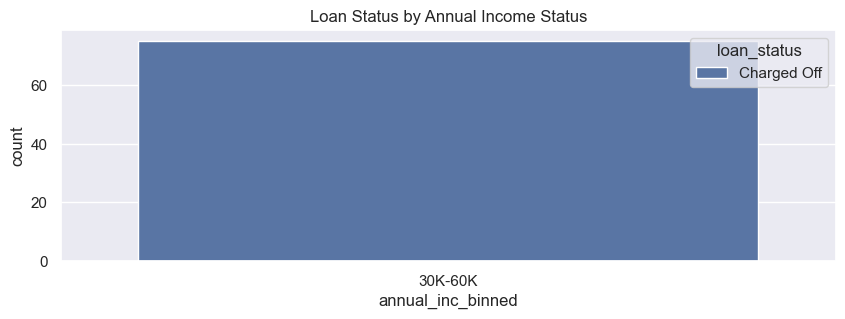

In [3676]:
# Plot loan default by employee annual income status

# Create bins for annual income

bins = [0, 30_000, 60_000, 90_000, 120_000, 150_000, 200_000]
labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '120K-150K', '>150K']
subset.loc[:, 'annual_inc_binned'] = pd.cut(subset.loc[:, 'annual_inc'], bins=bins, labels=labels)

plt.figure(figsize=(10, 3))
sns.countplot(x='annual_inc_binned', hue='loan_status', data=subset)
plt.title('Loan Status by Annual Income Status')
plt.show()

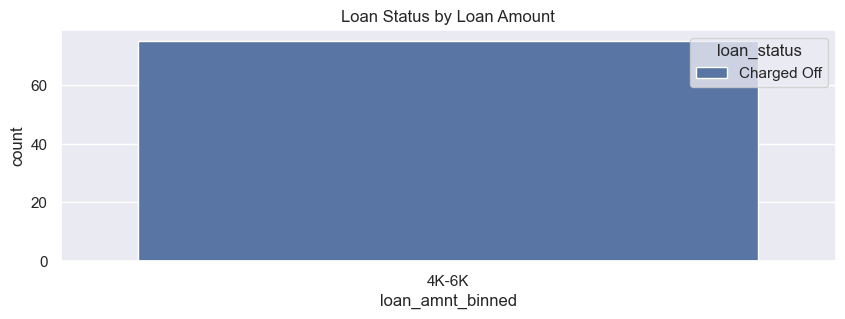

In [3678]:
# Plot loan default by considering Loan Amount

bins = [0, 2_000, 4_000, 6_000, 8_000, 10_000, 12_000, 14_000, 16_000, 18_000, 20_000, 35_000]
labels = ['<2K', '2K-4K', '4K-6K', '6K-8K', '8K-10K', '10K-12K', '12K-14K', '14K-16K', '16K-18K', '18K-20K', '>20K']
subset.loc[:, 'loan_amnt_binned'] = pd.cut(subset.loc[:, 'loan_amnt'], bins=bins, labels=labels)


plt.figure(figsize=(10, 3))
sns.countplot(x='loan_amnt_binned', hue='loan_status', data=subset)
plt.title('Loan Status by Loan Amount')
plt.show()

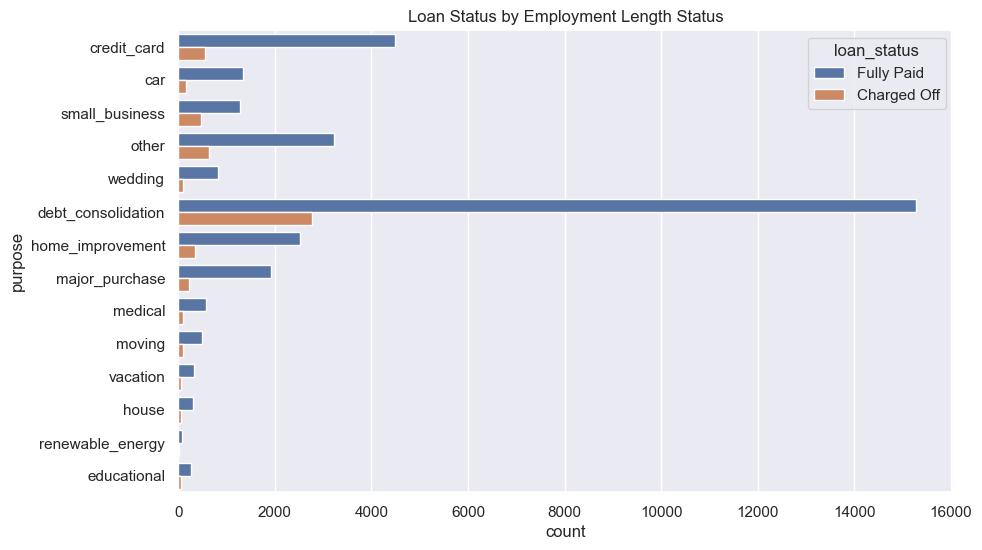

In [3350]:
# Distribution of purpose based on loan_status

plt.figure(figsize=(10, 6))
sns.countplot(y='purpose', hue='loan_status', data=subset)
plt.title('Loan Status by Employment Length Status')
plt.show()

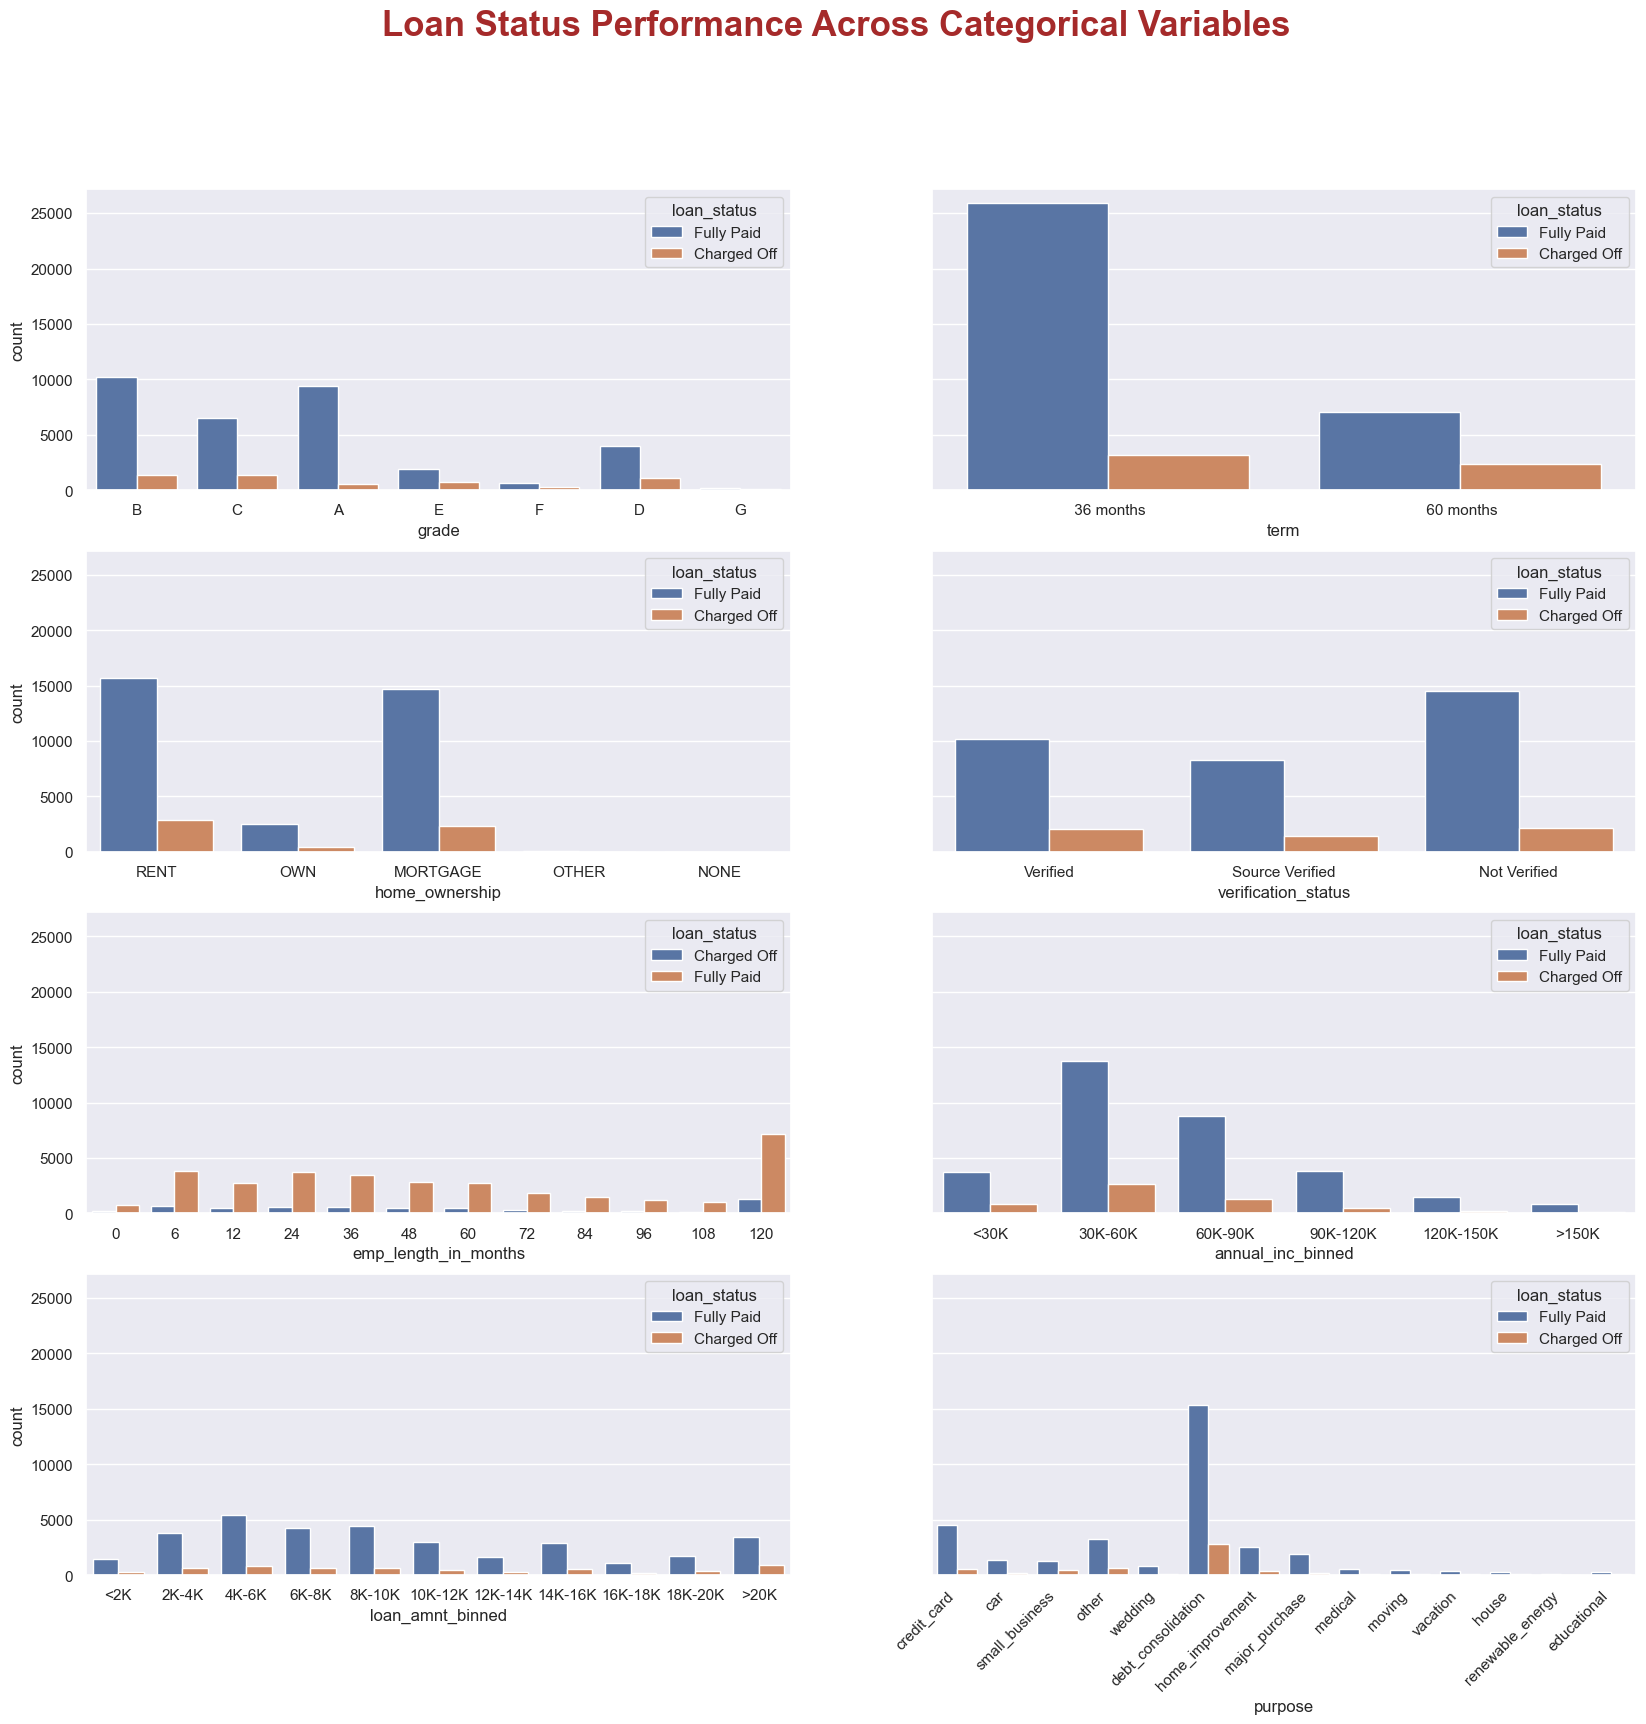

In [3351]:
# grade: Distribution of loan_status across grade, term, home_ownership, verification_status, emp_length, annual_inc, loan_amnt, purpose

fig, ax = plt.subplots(nrows = 4, ncols = 2, sharex=False, sharey=True)
fig.set_size_inches(20, 18, forward=True)

fig.suptitle('Loan Status Performance Across Categorical Variables', fontsize=25, fontweight='bold', color='brown')

sns.countplot(x='grade', hue='loan_status', data=subset, ax=ax[0,0])

sns.countplot(x='term', hue='loan_status', data=subset, ax=ax[0,1])

sns.countplot(x='home_ownership', hue='loan_status', data=subset, ax=ax[1,0])

sns.countplot(x='verification_status', hue='loan_status', data=subset, ax=ax[1,1])

sns.countplot(x='emp_length_in_months', hue='loan_status', data=subset, ax=ax[2,0])

sns.countplot(x='annual_inc_binned', hue='loan_status', data=subset, ax=ax[2,1])

sns.countplot(x='loan_amnt_binned', hue='loan_status', data=subset, ax=ax[3,0])

sns.countplot(x='purpose', hue='loan_status', data=subset, ax=ax[3,1])
plt.setp(ax[3, 1].get_xticklabels(), rotation=45, ha="right") 

plt.show()

## Observations
- grade: Grades B, C, D have a higher proportion of Charged Off loans compared to grades A, E, F and G. This suggests that loans with lower grades are more likely to default.
- term: 36-month loans have a slightly higher proportion of Charged Off loans compared to 60-month loans.
- home_ownership: Borrowers with a home ownership status of RENT and MORTGAGE have a slightly higher proportion of Charged Off loans compared to those with OWN or OTHER.
- verification_status: No clear patterns observed
- emp_length: Borrowers with 10+ year of employment have a slightly higher proportion of Charged Off loans. But <1 , 2, 3 and 4 also shows some irregularities.
- annual_inc: The proportion of Charged Off loans decreases as annual income increases. This indicates that borrowers with higher incomes are less likely to default. Borrowers with 30-60K annual income are more likely to default.
- purpose: Debt consolidation loans appear to have the most defaults (charged off). Categories like credit card , small business, other and home improvement show higher risks.

## Based on the above observations, going to analyse strong indicators further more

### Probability variables derived from above analysis
- grade: B, C, D
- home_ownership: RENT and MORTGAGE

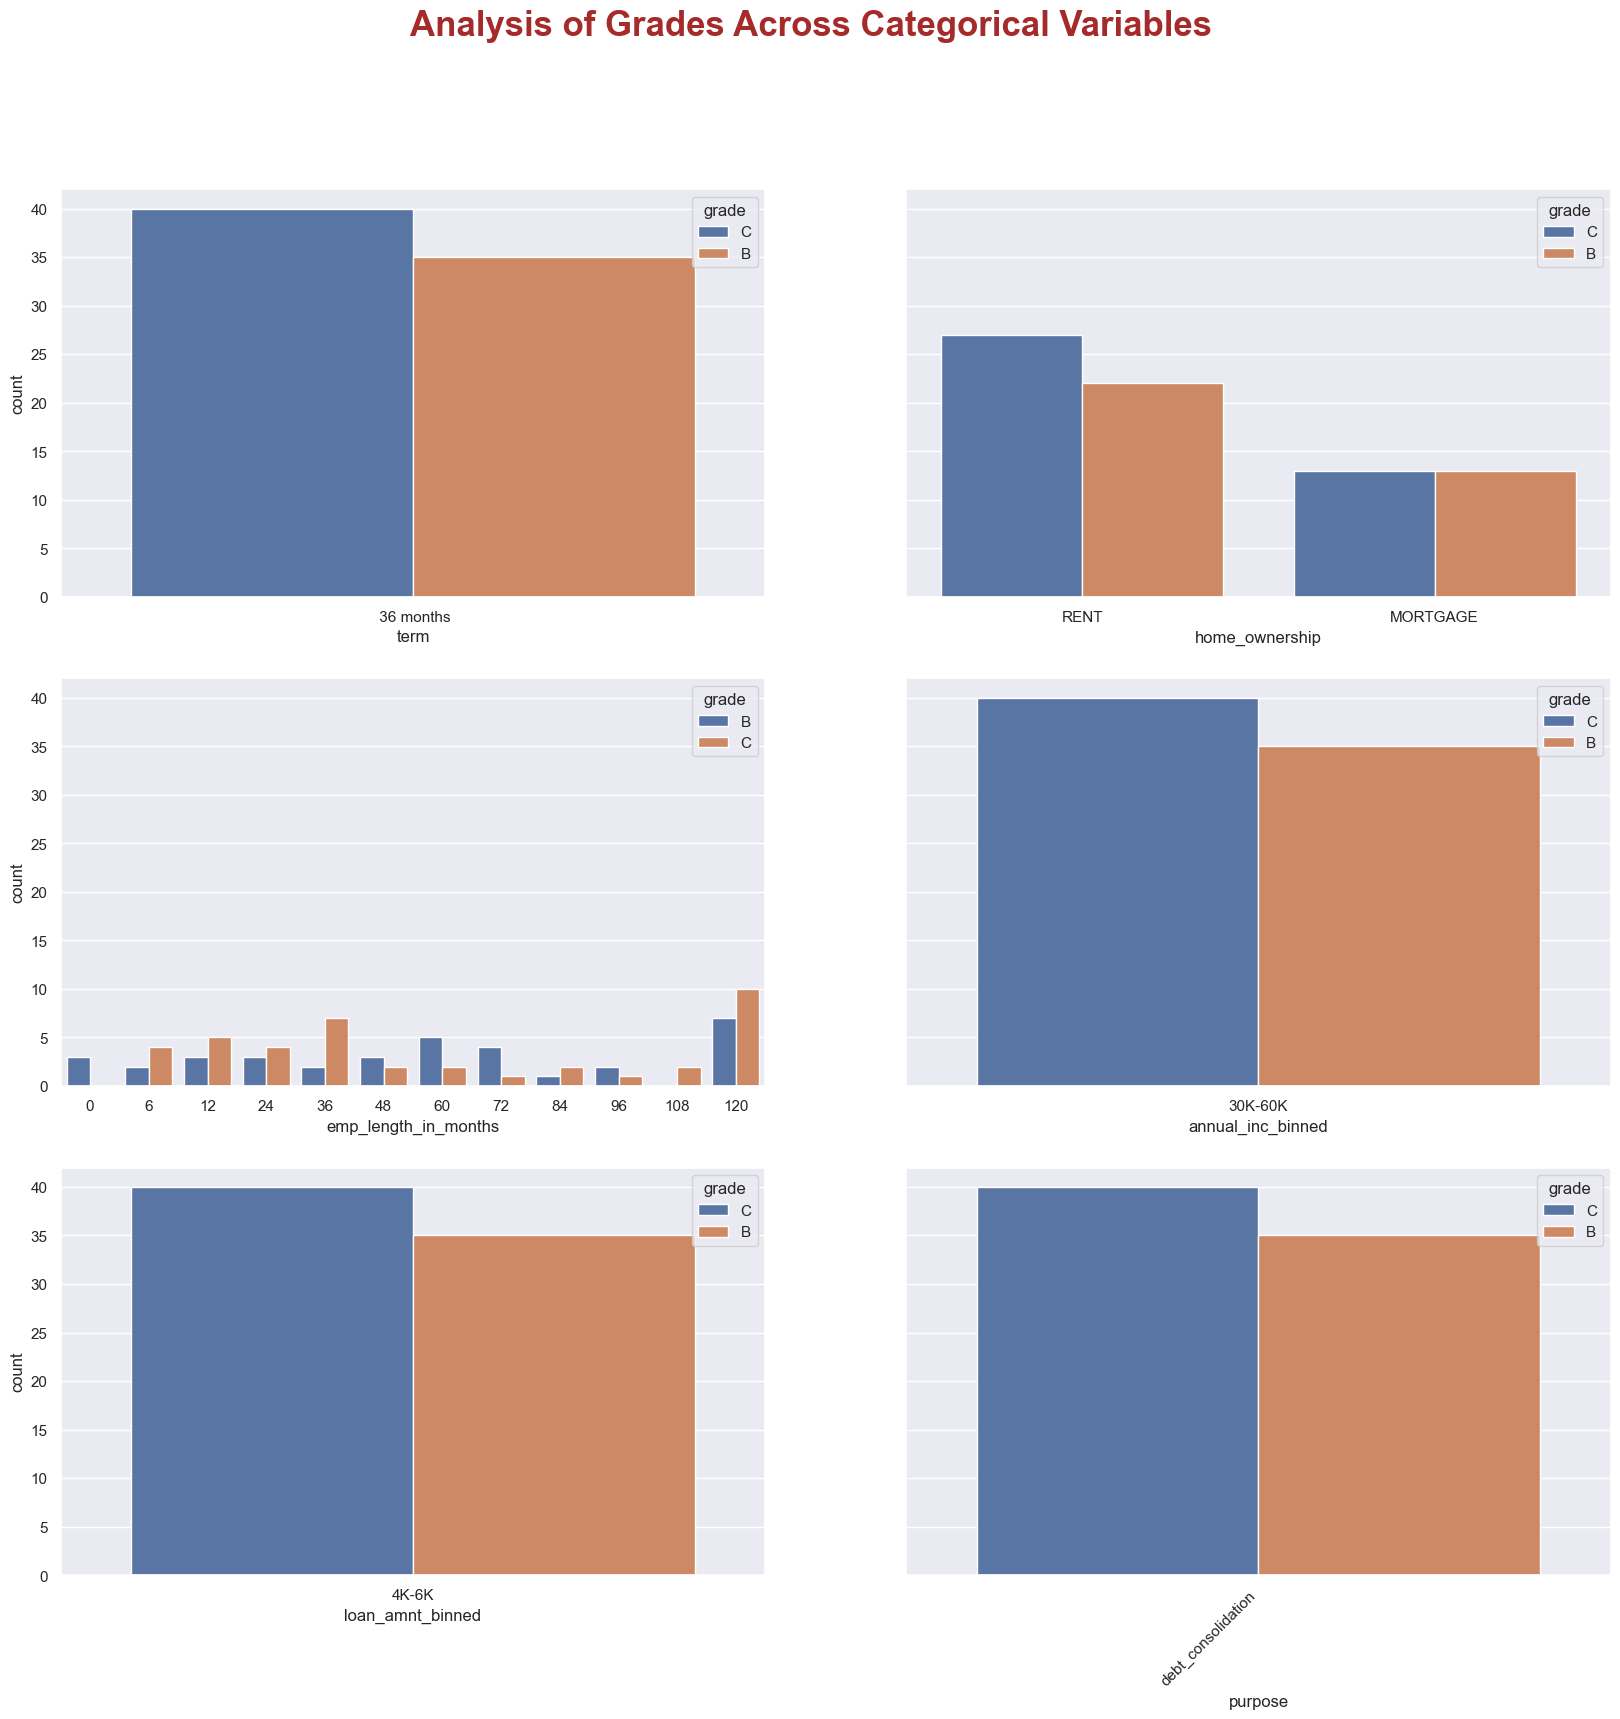

In [3680]:
# grade: Distribution of B, C, D across term, home_ownership, emp_length, annual_inc

subset = subset[subset.loc[:, "loan_status"] == "Charged Off"]
subset = subset[(subset["grade"] == "B") | (subset["grade"] == "C") | (subset["grade"] == "D")]

subset = subset[(subset["home_ownership"] == "RENT") | (subset["home_ownership"] == "MORTGAGE")]


fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex=False, sharey=True)
fig.set_size_inches(20, 18, forward=True)

fig.suptitle('Analysis of Grades Across Categorical Variables', fontsize=25, fontweight='bold', color='brown')

sns.countplot(x='term', hue='grade', data=subset, ax=ax[0,0])

sns.countplot(x='home_ownership', hue='grade', data=subset, ax=ax[0,1])

sns.countplot(x='emp_length_in_months', hue='grade', data=subset, ax=ax[1,0])

sns.countplot(x='annual_inc_binned', hue='grade', data=subset, ax=ax[1,1])

sns.countplot(x='loan_amnt_binned', hue='grade', data=subset, ax=ax[2,0])

sns.countplot(x='purpose', hue='grade', data=subset, ax=ax[2,1])
plt.setp(ax[2, 1].get_xticklabels(), rotation=45, ha="right") 

plt.show()

## Observations:
- B and C grades shows high relation with every other categories

### Probability variables derived from above analysis
- grade: B, C

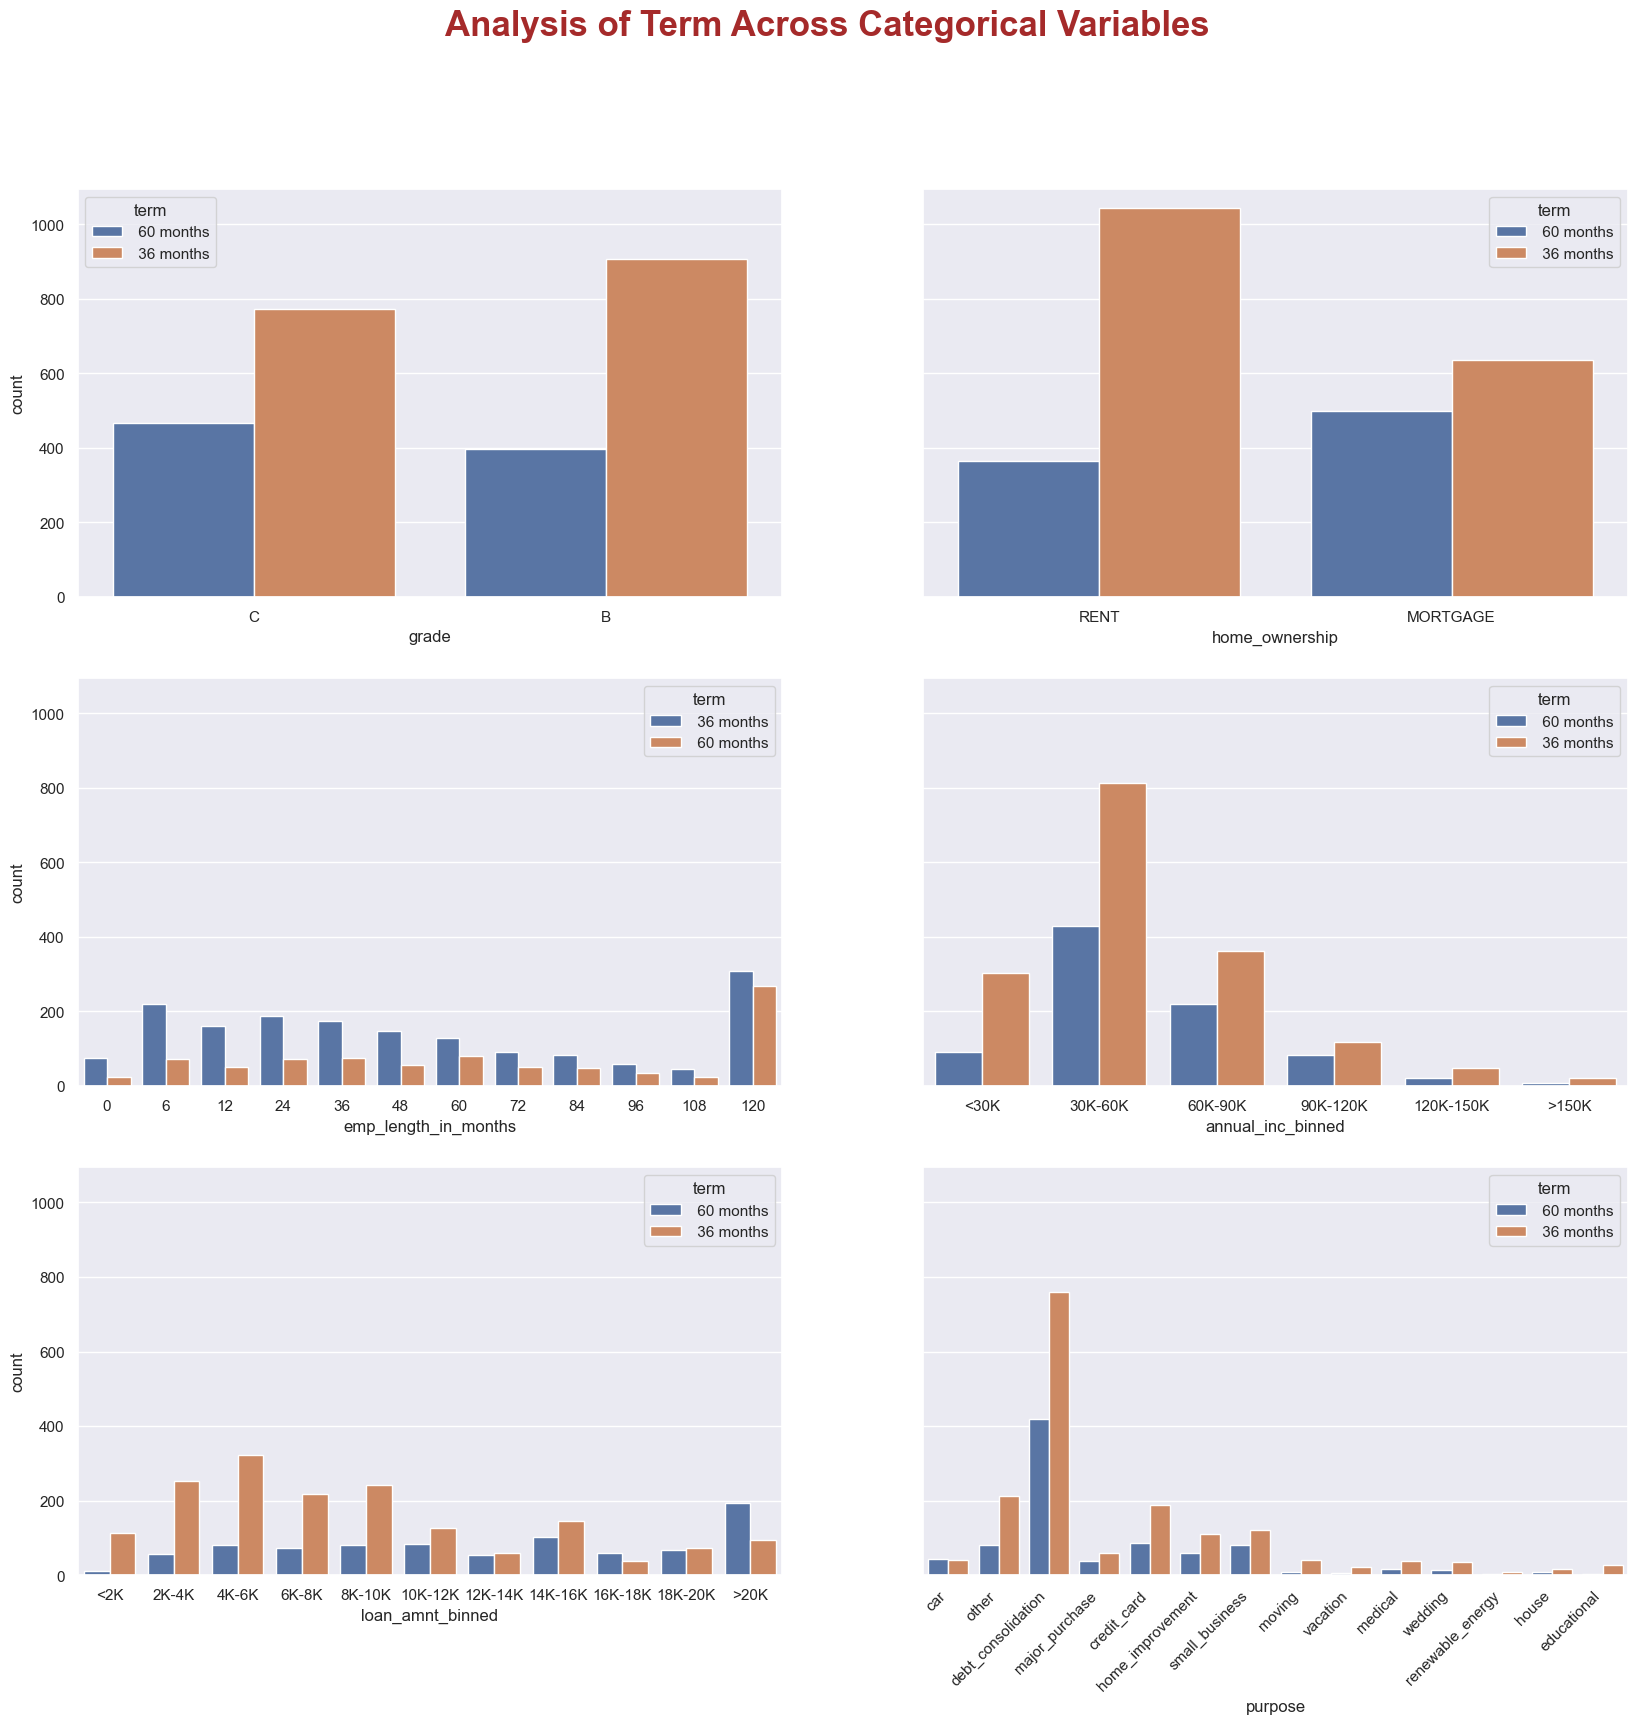

In [3463]:
subset = subset[(subset["grade"] == "B") | (subset["grade"] == "C")]


fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex=False, sharey=True)
fig.set_size_inches(20, 18, forward=True)

fig.suptitle('Analysis of Term Across Categorical Variables', fontsize=25, fontweight='bold', color='brown')

sns.countplot(x='grade', hue='term', data=subset, ax=ax[0,0])

sns.countplot(x='home_ownership', hue='term', data=subset, ax=ax[0,1])

sns.countplot(x='emp_length_in_months', hue='term', data=subset, ax=ax[1,0])

sns.countplot(x='annual_inc_binned', hue='term', data=subset, ax=ax[1,1])

sns.countplot(x='loan_amnt_binned', hue='term', data=subset, ax=ax[2,0])

sns.countplot(x='purpose', hue='term', data=subset, ax=ax[2,1])
plt.setp(ax[2, 1].get_xticklabels(), rotation=45, ha="right")

plt.show()

## Observations:
- 36 months duration shows strong relation with every other categories

## Probability variable derived from above analysis
- term: 36 months

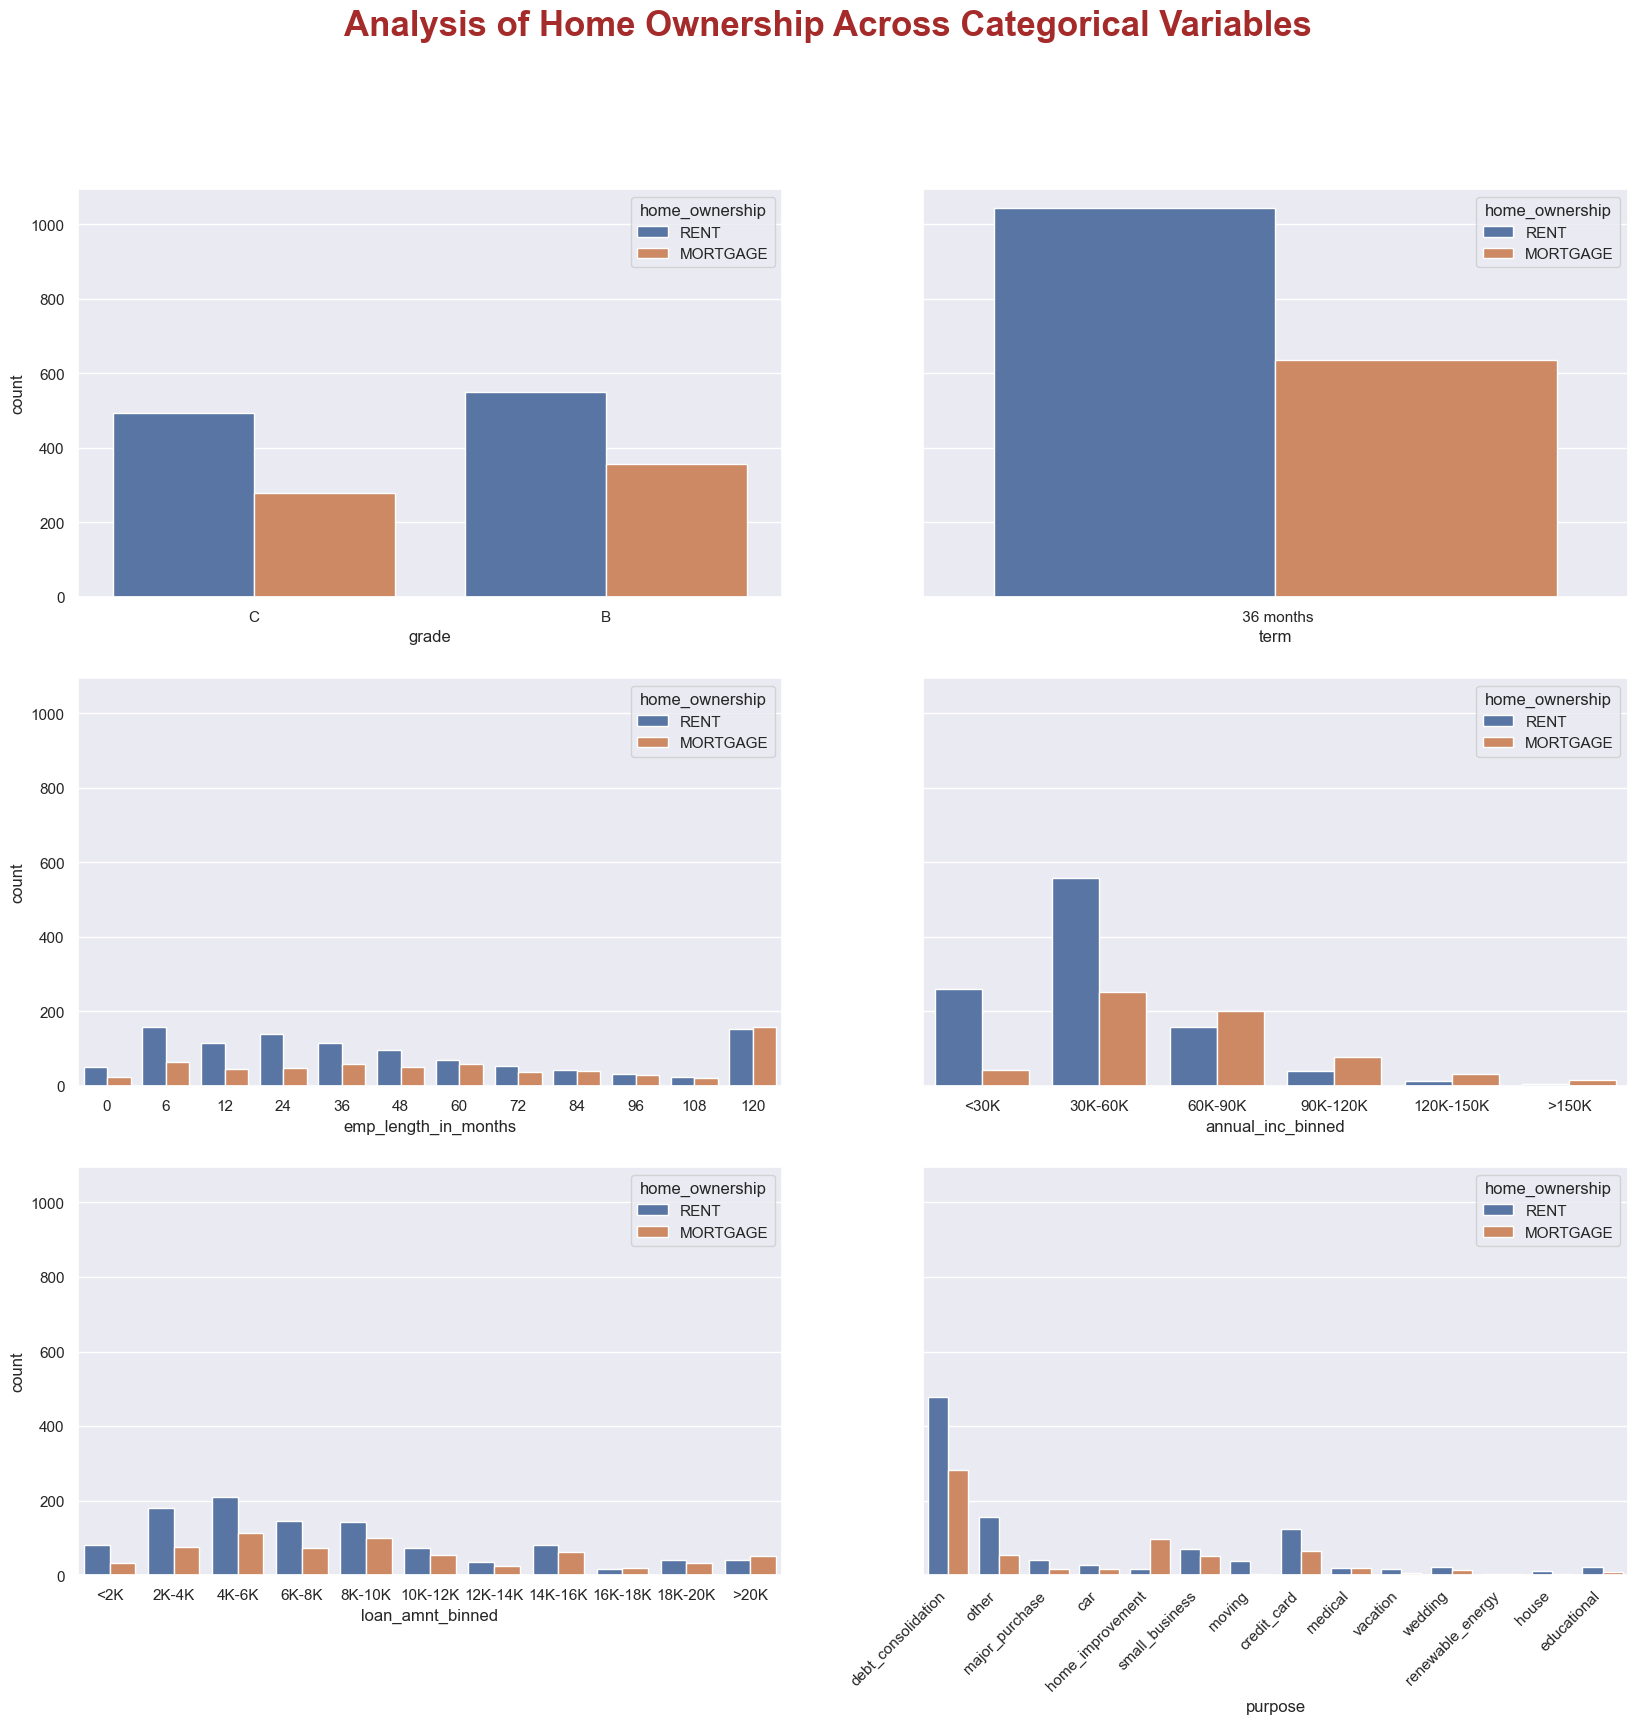

In [3470]:
subset = subset[subset.loc[:, "term"].str.strip() == "36 months"]

fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex=False, sharey=True)
fig.set_size_inches(20, 18, forward=True)

fig.suptitle('Analysis of Home Ownership Across Categorical Variables', fontsize=25, fontweight='bold', color='brown')

sns.countplot(x='grade', hue='home_ownership', data=subset, ax=ax[0,0])

sns.countplot(x='term', hue='home_ownership', data=subset, ax=ax[0,1])

sns.countplot(x='emp_length_in_months', hue='home_ownership', data=subset, ax=ax[1,0])

sns.countplot(x='annual_inc_binned', hue='home_ownership', data=subset, ax=ax[1,1])

sns.countplot(x='loan_amnt_binned', hue='home_ownership', data=subset, ax=ax[2,0])

sns.countplot(x='purpose', hue='home_ownership', data=subset, ax=ax[2,1])
plt.setp(ax[2, 1].get_xticklabels(), rotation=45, ha="right")

plt.show()

## Observations:
- RENT shows strong relation with every other categories except for employment length. Hence we will not going to filter this variable.

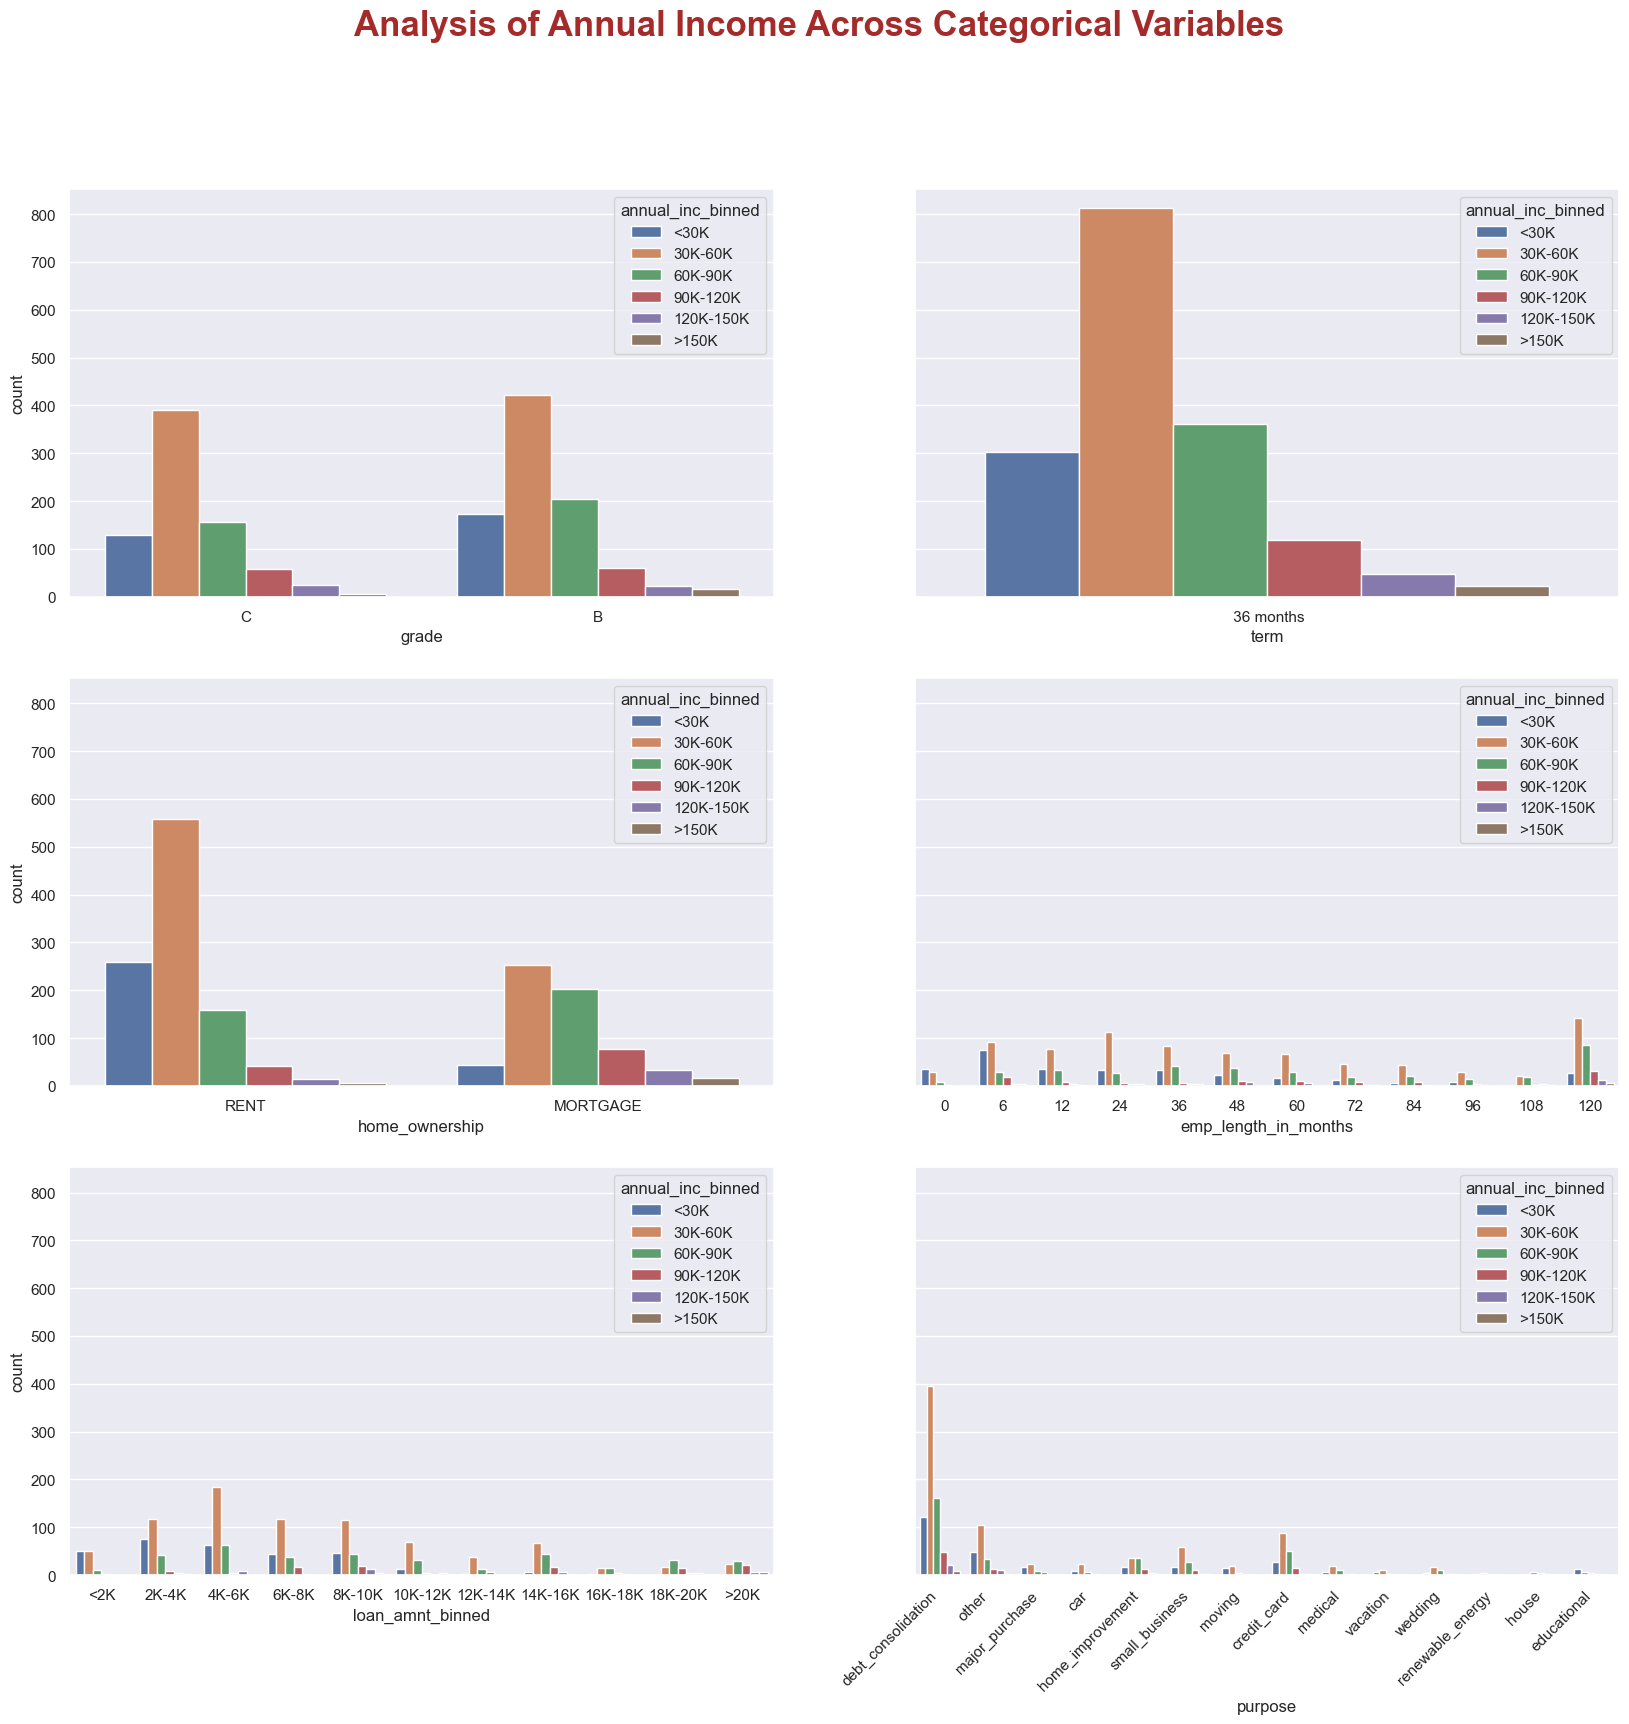

In [3484]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex=False, sharey=True)
fig.set_size_inches(20, 18, forward=True)
2
fig.suptitle('Analysis of Annual Income Across Categorical Variables', fontsize=25, fontweight='bold', color='brown')

sns.countplot(x='grade', hue='annual_inc_binned', data=subset, ax=ax[0,0])

sns.countplot(x='term', hue='annual_inc_binned', data=subset, ax=ax[0,1])

sns.countplot(x='home_ownership', hue='annual_inc_binned', data=subset, ax=ax[1,0])

sns.countplot(x='emp_length_in_months', hue='annual_inc_binned', data=subset, ax=ax[1,1])

sns.countplot(x='loan_amnt_binned', hue='annual_inc_binned', data=subset, ax=ax[2,0])

sns.countplot(x='purpose', hue='annual_inc_binned', data=subset, ax=ax[2,1])
plt.setp(ax[2, 1].get_xticklabels(), rotation=45, ha="right")
plt.show()

## Observations:
- Annual income of 30K-60K shows strong relation with every other categories. Hence we will filter this variable.

## Probability variable derived from above analysis
- annual_inc: 30K-60K

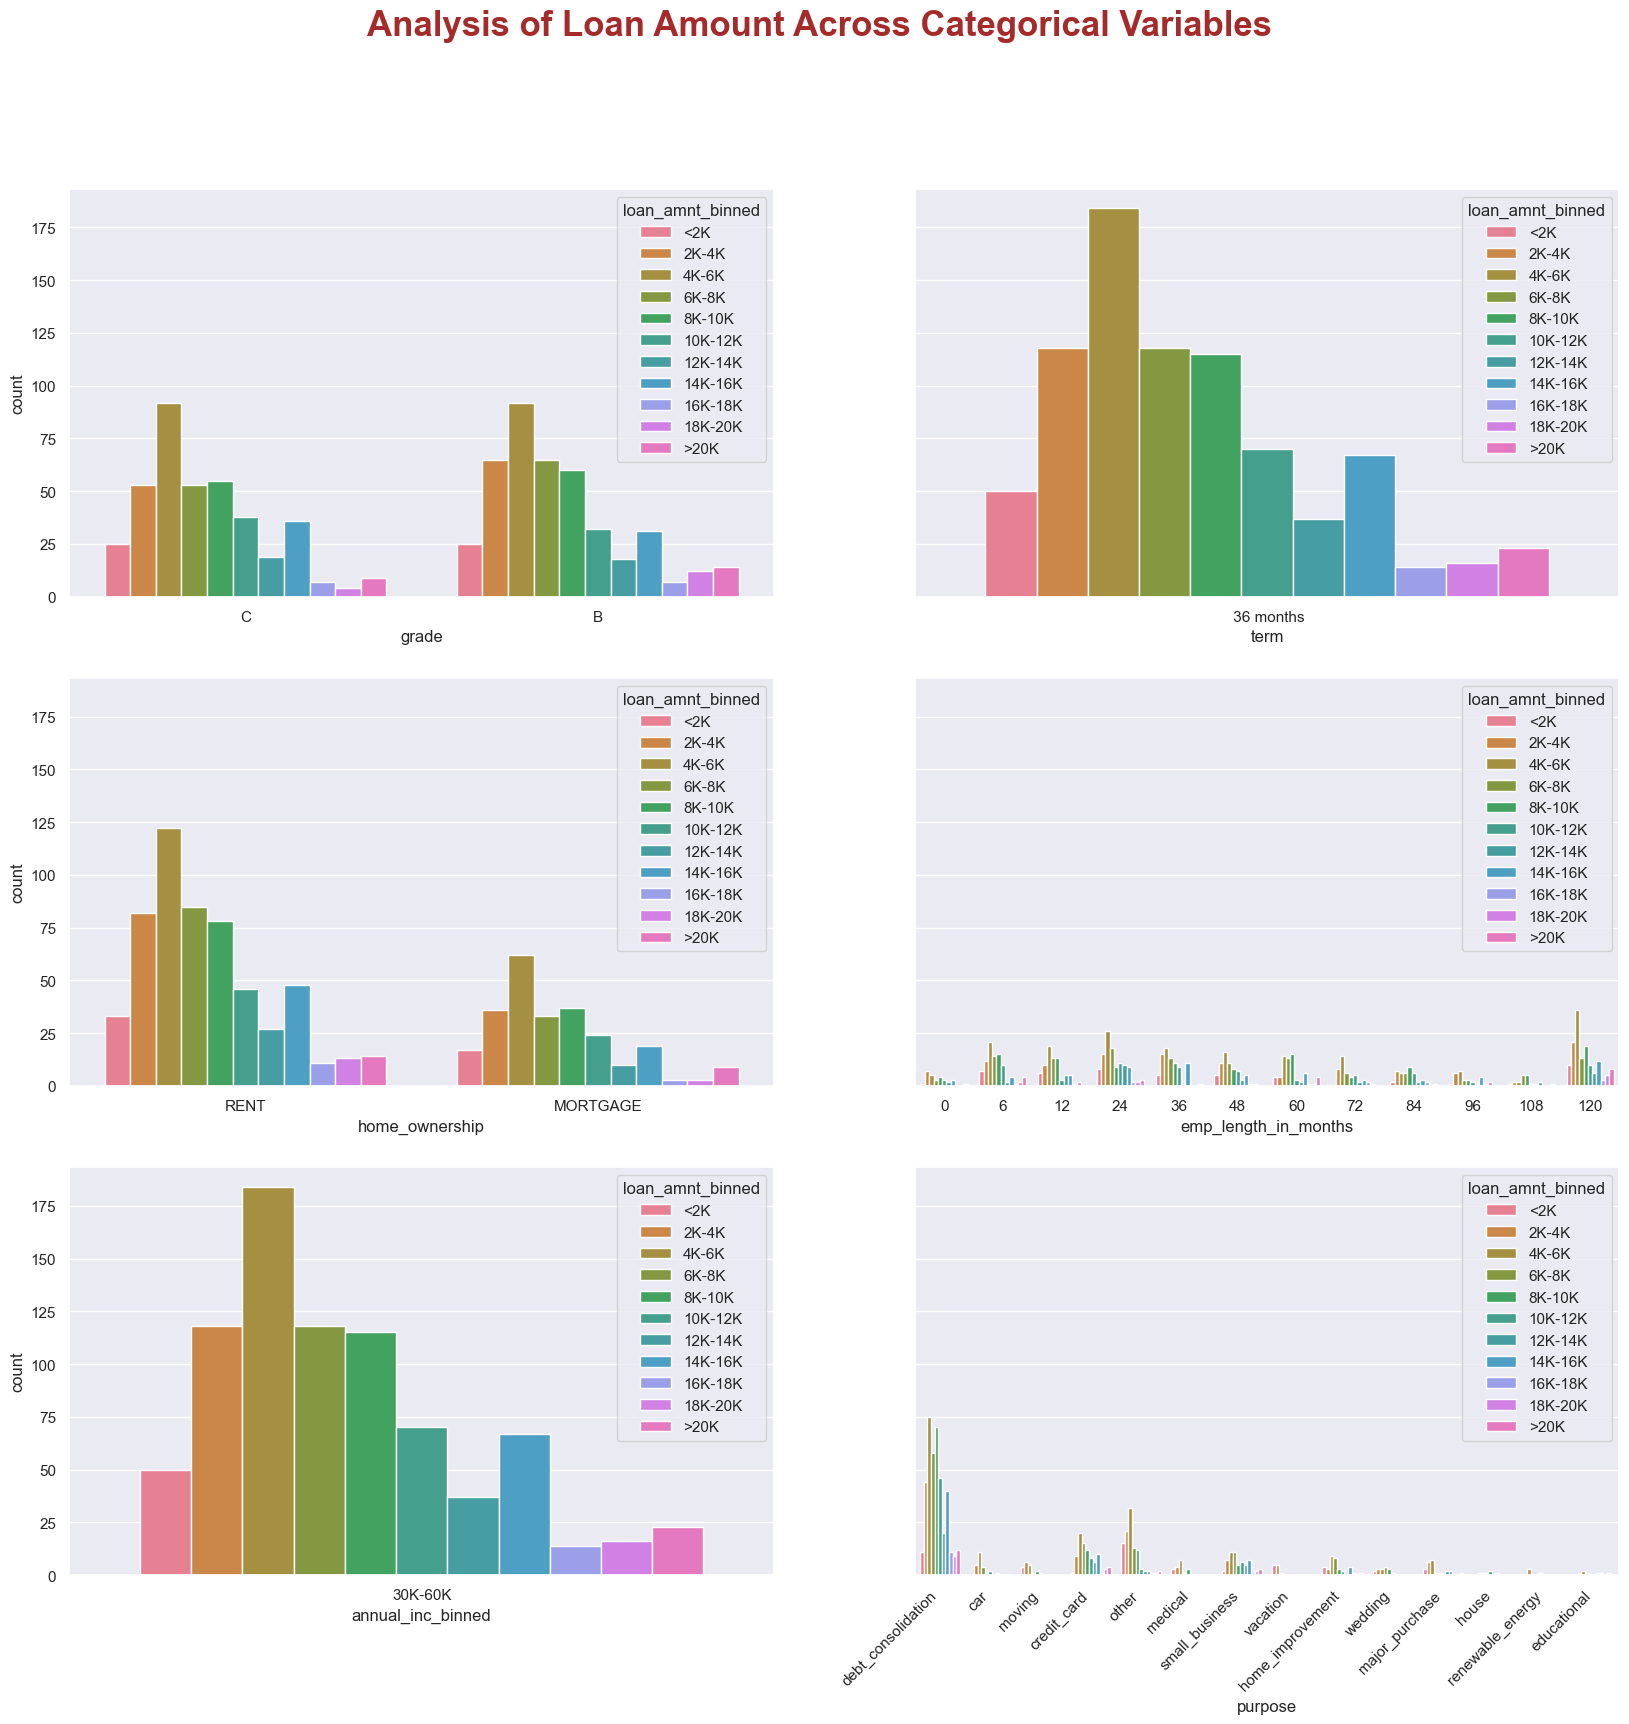

In [3523]:
subset = subset[subset["annual_inc_binned"] == "30K-60K"].copy()
subset["annual_inc_binned"] = '30K-60K'

fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex=False, sharey=True)
fig.set_size_inches(20, 18, forward=True)

fig.suptitle('Analysis of Loan Amount Across Categorical Variables', fontsize=25, fontweight='bold', color='brown')

sns.countplot(x='grade', hue='loan_amnt_binned', data=subset, ax=ax[0,0])

sns.countplot(x='term', hue='loan_amnt_binned', data=subset, ax=ax[0,1])

sns.countplot(x='home_ownership', hue='loan_amnt_binned', data=subset, ax=ax[1,0])

sns.countplot(x='emp_length_in_months', hue='loan_amnt_binned', data=subset, ax=ax[1,1])

sns.countplot(x='annual_inc_binned', hue='loan_amnt_binned', data=subset, ax=ax[2,0])

sns.countplot(x='purpose', hue='loan_amnt_binned', data=subset, ax=ax[2,1])
plt.setp(ax[2, 1].get_xticklabels(), rotation=45, ha="right")

plt.show()

## Observations:
- Loan amount of 4K-6K shows strong relation with every other categories. Hence we will filter this variable.

## Probability variable derived from above analysis
- loan_amnt: 4K-6K

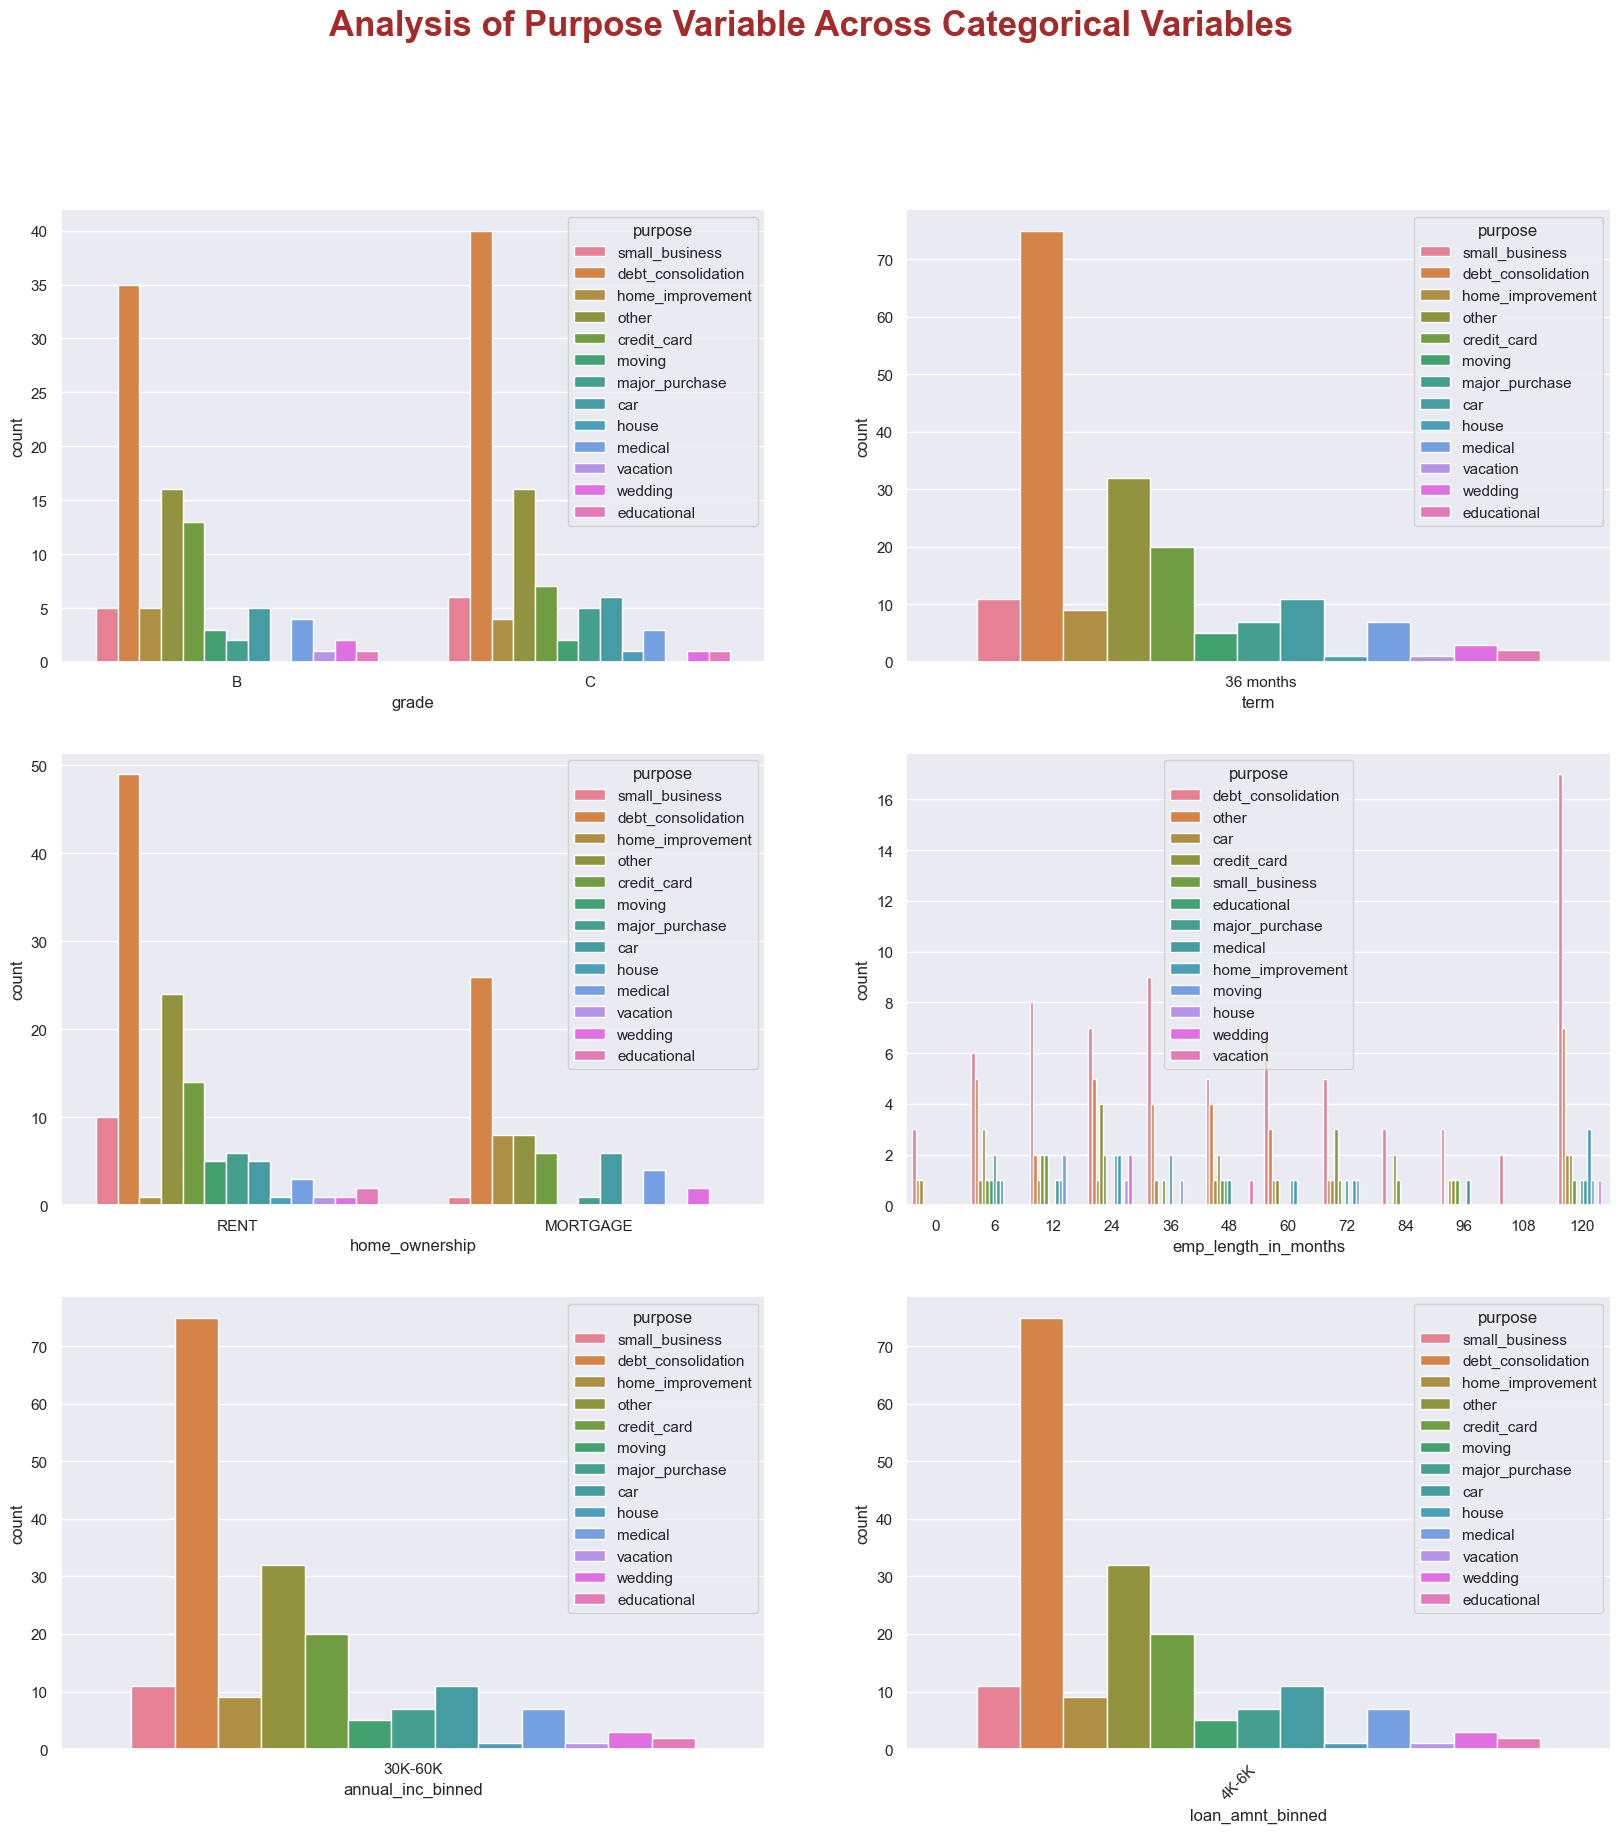

In [3546]:
subset = subset[subset["loan_amnt_binned"] == "4K-6K"].copy()
subset["loan_amnt_binned"] = '4K-6K'


subset = subset[subset["loan_amnt_binned"] == "4K-6K"].copy()
subset["loan_amnt_binned"] = '4K-6K'

fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex=False, sharey=False)
fig.set_size_inches(20, 20, forward=True)

fig.suptitle('Analysis of Purpose Variable Across Categorical Variables', fontsize=25, fontweight='bold', color='brown')

sns.countplot(x='grade', hue='purpose', data=subset, ax=ax[0,0])

sns.countplot(x='term', hue='purpose', data=subset, ax=ax[0,1])

sns.countplot(x='home_ownership', hue='purpose', data=subset, ax=ax[1,0])

sns.countplot(x='emp_length_in_months', hue='purpose', data=subset, ax=ax[1,1])

sns.countplot(x='annual_inc_binned', hue='purpose', data=subset, ax=ax[2,0])

sns.countplot(x='loan_amnt_binned', hue='purpose', data=subset, ax=ax[2,1])
plt.setp(ax[2, 1].get_xticklabels(), rotation=45, ha="right")

plt.show()

## Observations:
- Debt consolidation shows strong relation with every other categories. Hence we will filter this variable.

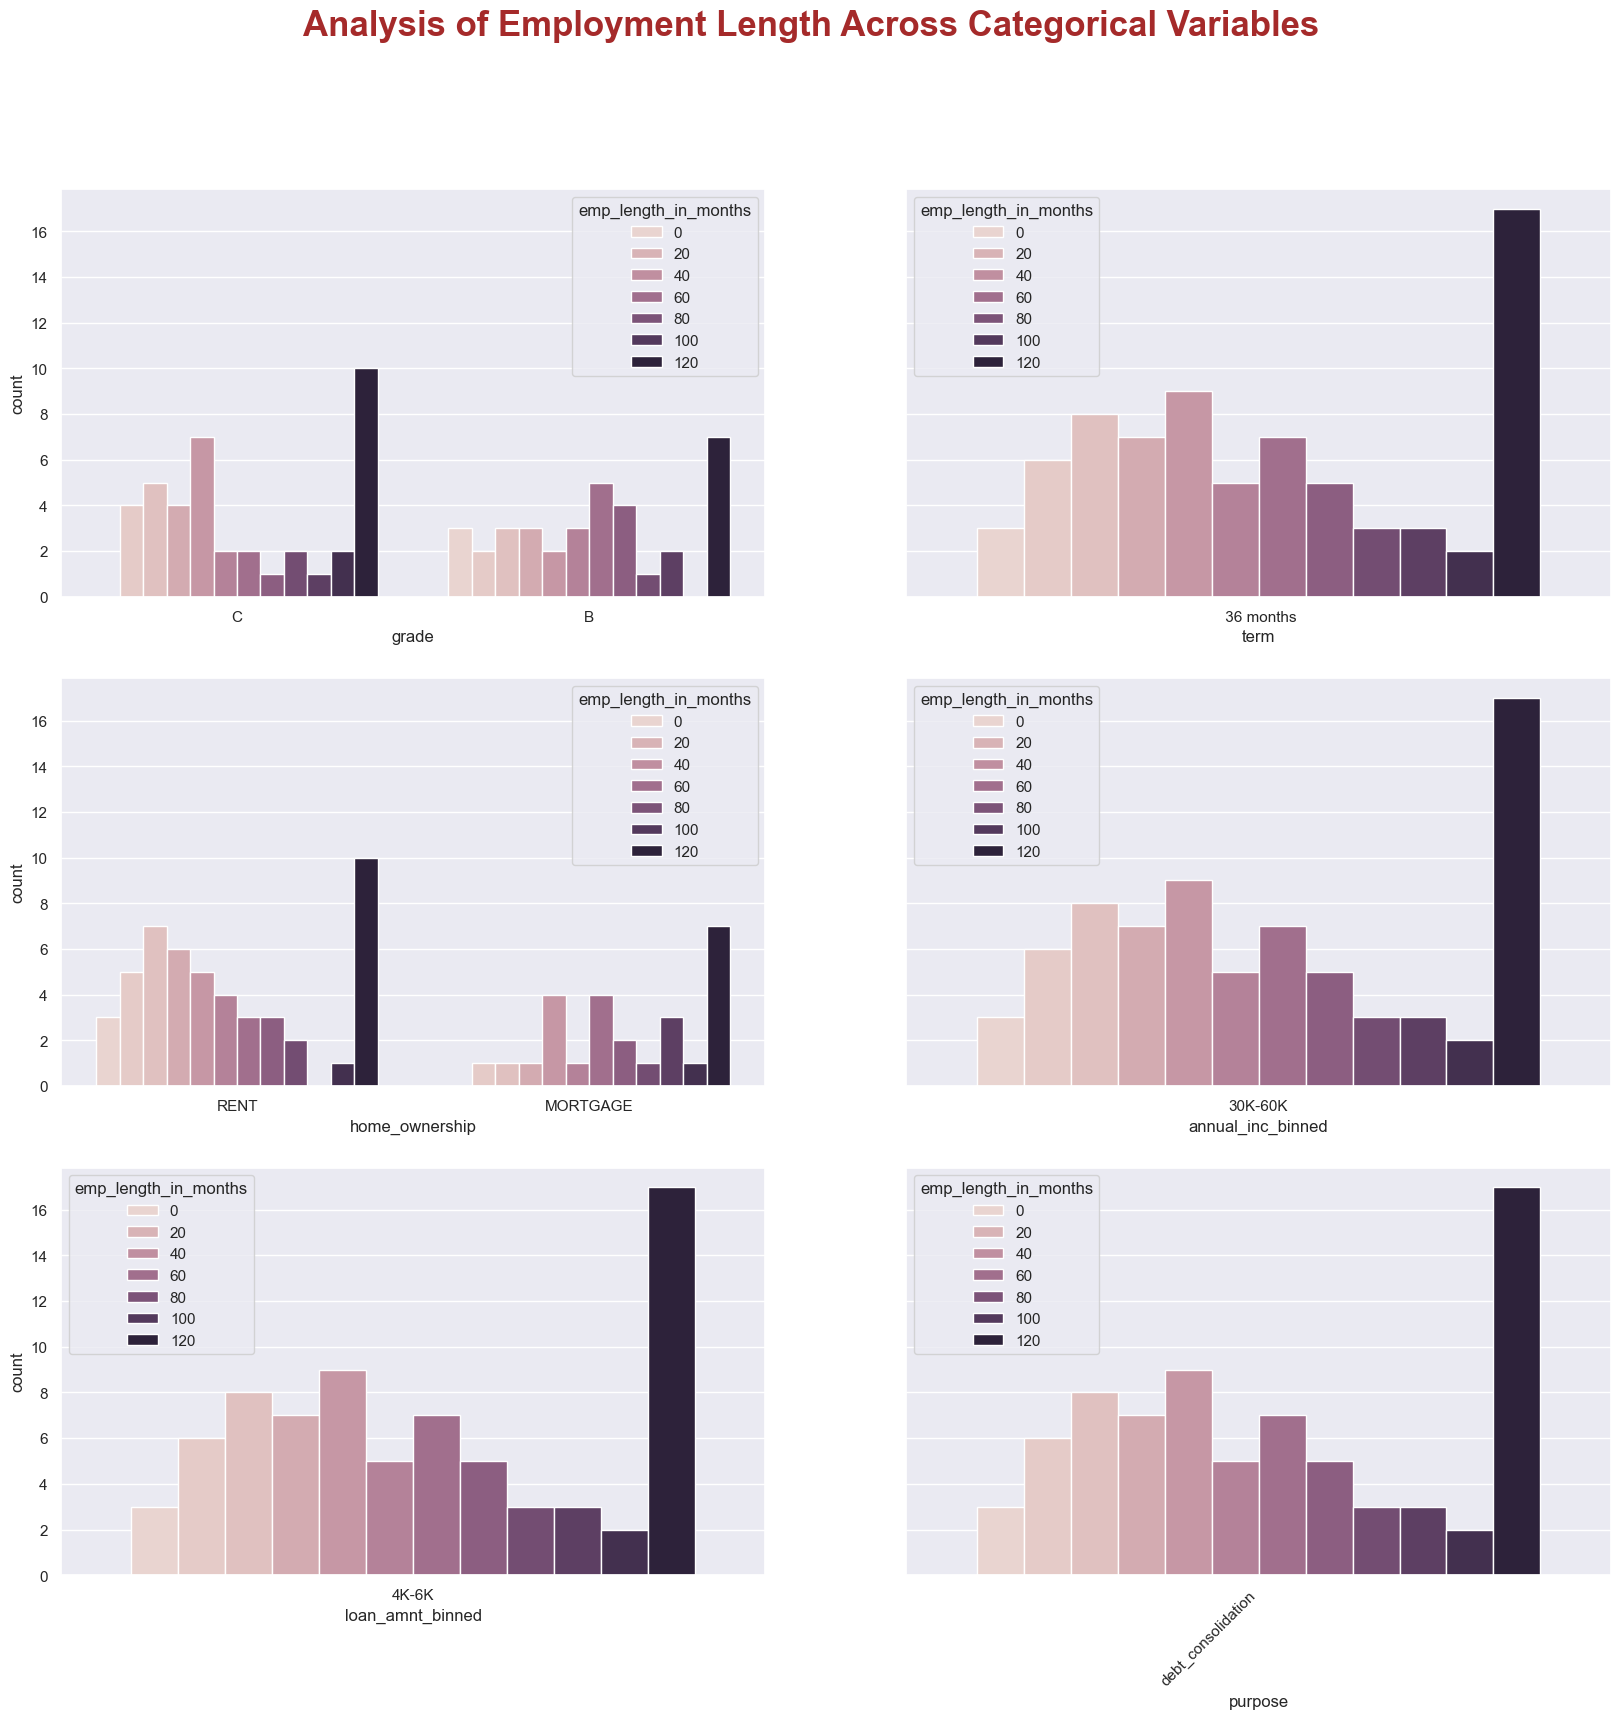

In [3562]:
subset = subset[subset["purpose"] == "debt_consolidation"]

fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex=False, sharey=True)
fig.set_size_inches(20, 18, forward=True)

fig.suptitle('Analysis of Employment Length Across Categorical Variables', fontsize=25, fontweight='bold', color='brown')

sns.countplot(x='grade', hue='emp_length_in_months', data=subset, ax=ax[0,0])

sns.countplot(x='term', hue='emp_length_in_months', data=subset, ax=ax[0,1])

sns.countplot(x='home_ownership', hue='emp_length_in_months', data=subset, ax=ax[1,0])

sns.countplot(x='annual_inc_binned', hue='emp_length_in_months', data=subset, ax=ax[1,1])

sns.countplot(x='loan_amnt_binned', hue='emp_length_in_months', data=subset, ax=ax[2,0])

sns.countplot(x='purpose', hue='emp_length_in_months', data=subset, ax=ax[2,1])
plt.setp(ax[2, 1].get_xticklabels(), rotation=45, ha="right") 

plt.show()

## Observations:
- Employment length of 10+ years shows strong relation with every other categories.

# Finally the probability of Loan Defaulters exist with the following combination
- grade: B, C
- 
term: 36 month
- 
home_ownership: RE
- E
emp_len: 10+ years
- th
annual_inc: 30K
- loan_amnt: 4K-6K
- purpose: debt_consolidation-60K


## Numerical Variables
- loan_amnt
- int_rate
- emp_length
- dti
- annual_inc

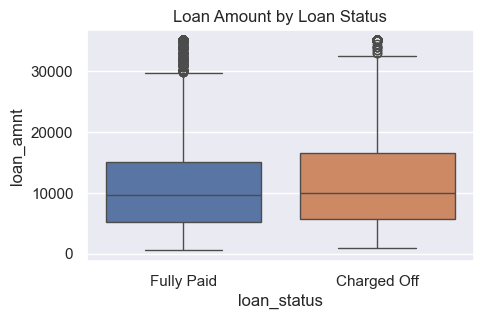

In [1782]:
# Plot loan amount by loan status

plt.figure(figsize=(5, 3))
sns.boxplot(x='loan_status', y='loan_amnt', data=subset, hue='loan_status', palette='deep', legend=False)
plt.title('Loan Amount by Loan Status')
plt.show()

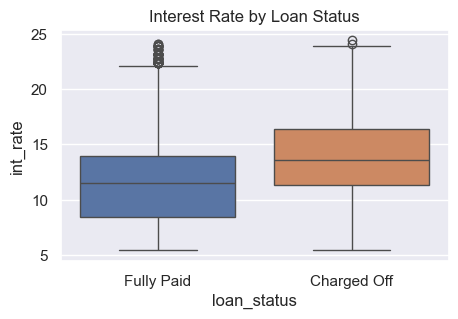

In [1783]:
# Plot interest rate by loan status

plt.figure(figsize=(5, 3))
sns.boxplot(x='loan_status', y='int_rate', data=subset, hue='loan_status', palette='deep', legend=False)
plt.title('Interest Rate by Loan Status')
plt.show()

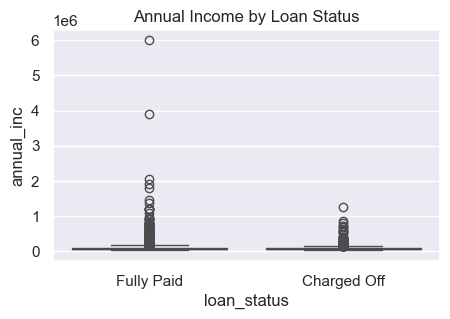

In [1784]:
# Plot annual income by loan status

plt.figure(figsize=(5, 3))
sns.boxplot(x='loan_status', y='annual_inc', data=subset, hue='loan_status', palette='deep', legend=False)
plt.title('Annual Income by Loan Status')
plt.show()

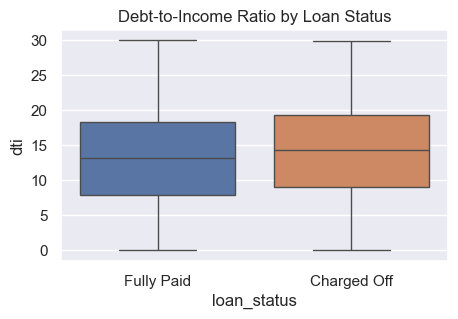

In [1785]:
# Plot debt-to-income ratio (DTI) by loan status

plt.figure(figsize=(5, 3))
sns.boxplot(x='loan_status', y='dti', data=subset, hue='loan_status', palette='deep', legend=False)
plt.title('Debt-to-Income Ratio by Loan Status')
plt.show()

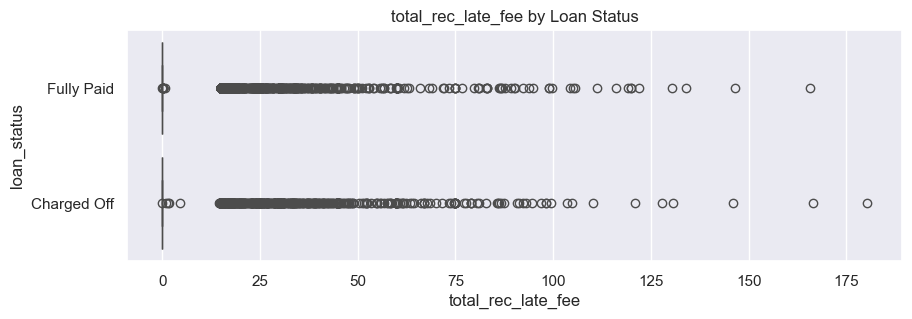

In [1786]:
# Plot total_rec_late_fee by loan status

plt.figure(figsize=(10, 3))
sns.boxplot(y='loan_status', x='total_rec_late_fee', data=subset, hue='loan_status', palette='deep', legend=False)
plt.title('total_rec_late_fee by Loan Status')
plt.show()

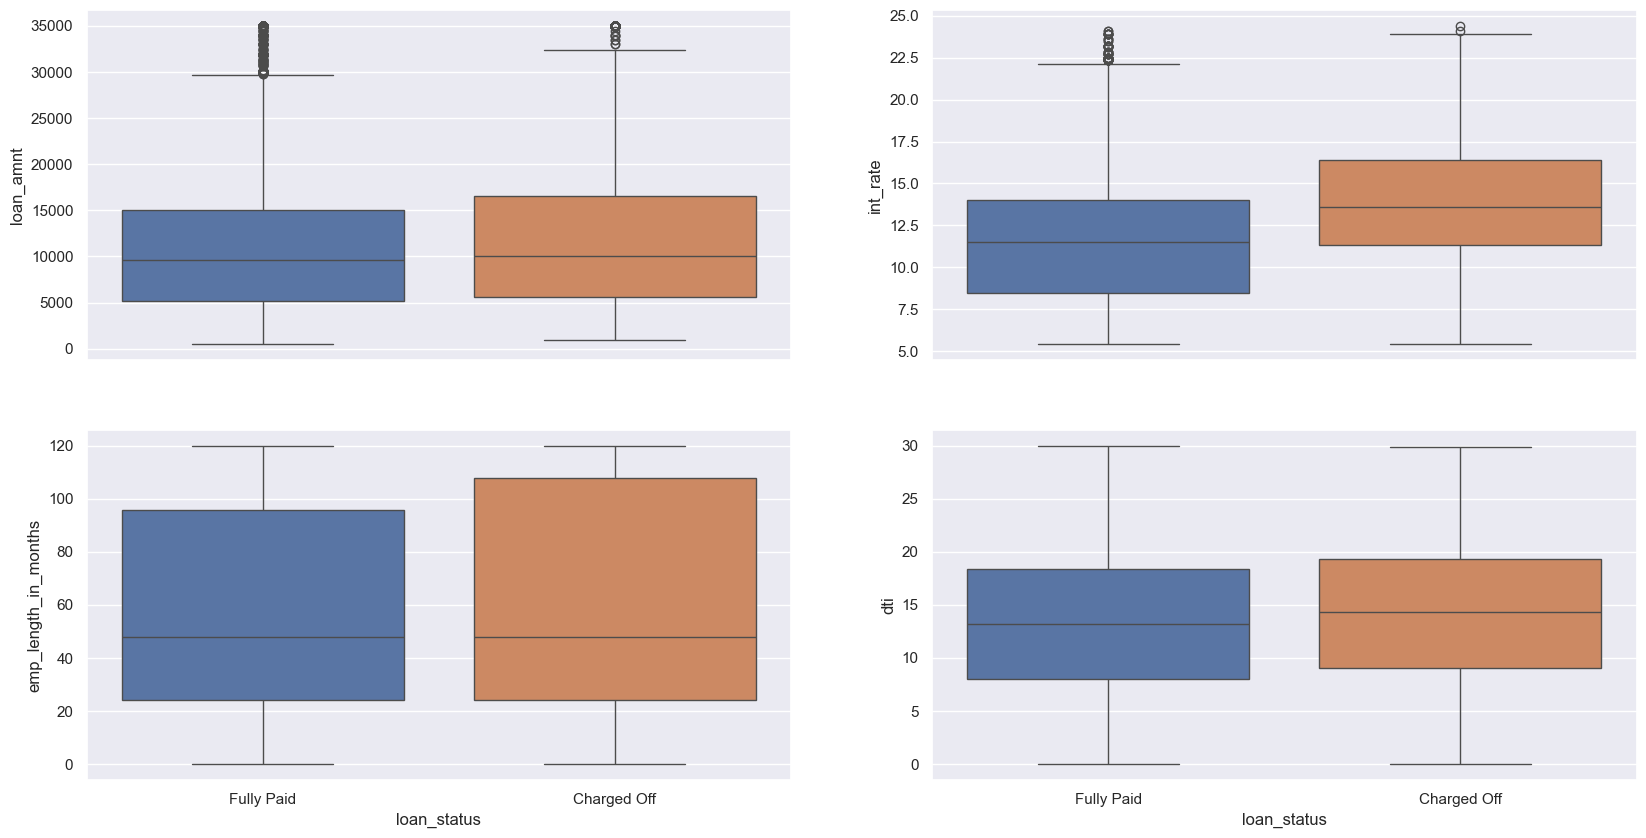

In [1787]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey=False)

sns.boxplot(x='loan_status', y='loan_amnt', data=subset, ax=ax[0,0], hue='loan_status', palette='deep', legend=False)

sns.boxplot(x='loan_status', y='int_rate', data=subset, ax=ax[0,1], hue='loan_status', palette='deep', legend=False)

sns.boxplot(x='loan_status', y='emp_length_in_months', data=subset, ax=ax[1,0], hue='loan_status', palette='deep', legend=False)

sns.boxplot(x='loan_status', y='dti', data=subset, ax=ax[1,1], hue='loan_status', palette='deep', legend=False)

fig.set_size_inches(20, 10, forward=True)

plt.show()

## Observations
- loan_amnt: The distribution of loan amount for charged off loans is more spread out
- 
int_rat: The distribution of interest rates for Charged Off loans is also more spread out, with a longer tail on the right side. This suggests that borrowers with higher interest rates are more likely to default.
- emp_length: The distribution of employment lengths for charged-off loans is more spread out, indicating that employment length is not a strong predictor of default.
- c
: no clear patterndti

## Credit History Variables
- delinq_2yrs
- inq_last_6mths
- pub_rec
- pub_rec_bankruptcies

In [ ]:
# Plot delinquencies in the last 2 years by loan status

plt.figure(figsize=(5, 3))
sns.boxplot(x='loan_status', y='delinq_2yrs', data=subset, hue='loan_status', palette='deep', legend=False)
plt.title('Delinquencies in Last 2 Years by Loan Status')
plt.show()

In [ ]:
# Plot inquiries in the last 6 months by loan status

plt.figure(figsize=(5, 3))
sns.boxplot(x='loan_status', y='inq_last_6mths', data=subset, hue='loan_status', palette='deep', legend=False)
plt.title('Inquiries in Last 6 Months by Loan Status')
plt.show()

In [ ]:
# Plot public records by loan status

plt.figure(figsize=(5, 3))
sns.boxplot(x='loan_status', y='pub_rec', data=subset, hue='loan_status', palette='deep', legend=False)
plt.title('Public Records by Loan Status')
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey=False)

sns.boxplot(x='loan_status', y='delinq_2yrs', data=subset, ax=ax[0,0], hue='loan_status', palette='deep', legend=False)

sns.boxplot(x='loan_status', y='inq_last_6mths', data=subset, ax=ax[0,1], hue='loan_status', palette='deep', legend=False)

sns.boxplot(x='loan_status', y='pub_rec', data=subset, ax=ax[1,0], hue='loan_status', palette='deep', legend=False)

sns.boxplot(x='loan_status', y='pub_rec_bankruptcies', data=subset, ax=ax[1,1], hue='loan_status', palette='deep', legend=False)

fig.set_size_inches(20, 10, forward=True)

plt.show()

## Observations
- delinq_2yrs: No clear pattern
- inq_last_6mths: The median number of inquiries for Charged Off loans is slightly higher than that for Fully Paid loans. The distribution of inquiries for Charged Off loans is also more spread out, with a longer tail on the right side. This suggests that borrowers with a higher number of inquiries might be more likely to default.
- pub_rec: No clear pattern
- pub_rec_bankruptcies: No clear pattern

### Primary factors that can be leveraged to forecast the probability of loan default and reduce credit loss.
- Loan Grade: Borrowers with a loan grade of B or C exhibit a higher likelihood of default.
- Loan Term: 36-month loans show a marginally higher proportion of defaults compared to 60-month loans.
- Home Ownership: Renters are more prone to default than homeowners, making "RENT" a critical indicator.
- Employment Length: Borrowers with over 10 years of employment tend to have a slightly higher risk of default than those with shorter employment histories.
- Annual Income: Borrowers with an annual income between 30,000 and 60,000 are more likely to default. Additionally, the analysis indicates that the probability of default decreases as income rises, with lower-income groups showing a higher risk.
- Loan Amount: Borrowers requesting loan amounts in the range of 4,000 to 6,000, particularly for debt consolidation, are more likely to default.
- Loan Purpose: Debt consolidation loans and credit card refinancing have higher default rates. Other categories such as small business loans, general loans ("other"), and home improvement loans also present elevated risks.
- Inquiries in the Last 6 Months: Borrowers with a higher number of credit inquiries within the past six months are more likely to default, indicating a relationship between recent credit activity and default risk.